#Hetero (fit) quality + hetero rhetoric

<Figure size 540x396 with 0 Axes>

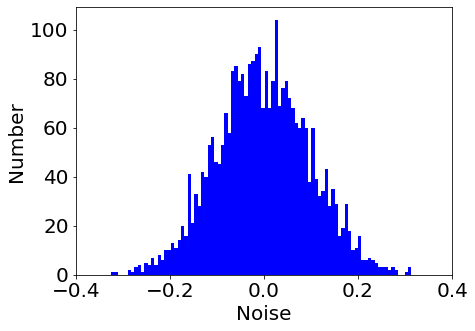

In [ ]:
import numpy as np
np.random.seed(100000)
import matplotlib.pyplot as plt  
num=3000
noise =0.1
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True
noise_list=np.random.normal(0, noise, size=num)
n, bins, patches = plt.hist(noise_list, 90, facecolor='b', alpha=1, histtype="stepfilled")
plt.xlabel('Noise')
plt.ylabel('Number')
plt.xlim(-0.4, .4)
plt.grid(False)
plt.show()

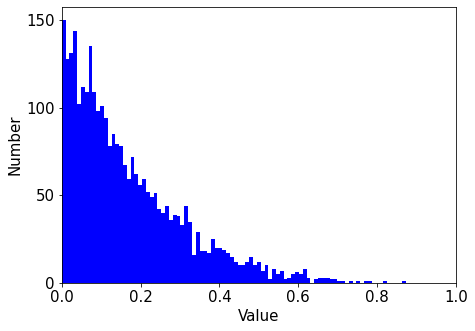

In [ ]:
import numpy as np
np.random.seed(100000)
import matplotlib.pyplot as plt  
num=3000
#ICLR 2022: https://github.com/fedebotu/ICLR2022-OpenReviewData
#ICLR 2021: https://github.com/evanzd/ICLR2021-OpenReviewData
#ICLR 2020: https://github.com/shaohua0116/ICLR2020-OpenReviewData
#ICLR 2019: https://github.com/shaohua0116/ICLR2019-OpenReviewData
#mu, sigma = 0.5, 0.15# for high peak
#mu, sigma = 0.5, 0.2# for low peak
#mu, sigma = 0.8, 0.2# for right skewed
#mu, sigma = 0.2, 0.2# for left skewed
#lower, upper = 0, 1
#X1 = stats.truncnorm(
#  (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
#normative=list(X1.rvs(num))
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True
normative=np.random.beta(1, 5, size=num)
plt.rcParams.update({'font.size': 20})
n, bins, patches = plt.hist(normative, 90, facecolor='b', alpha=1, histtype="stepfilled")
plt.xlabel('Value')
plt.ylabel('Number')
plt.xlim(0,1)
plt.grid(False)
plt.show()

In [ ]:
#model 2: heterogeneous quality + heterogeneous rhetoric
#rank-based
import random
import numpy as np
random.seed(100000)
np.random.seed(100000)
import matplotlib.pyplot as plt  
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True
import scipy.stats as stats
from scipy.stats import pearsonr
import pandas as pd
import seaborn as sns
from scipy.stats import norm
plt.rcParams.update({'font.size': 20})

def gini_coefficient(x):
    """Compute Gini coefficient of array of values"""
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x)**2 * np.mean(x))

def f(a,N):
    """Get indices of the top N values of a list"""
    return np.argsort(a)[::-1][:N]

#args you need to use
tmax= 1000#time steps
#-----------------------------
num = 600#paper population
nummax=600
#-----------------------------
reference = 35 #expected reference size, need to vary
refmax =35
#-----------------------------
reading = 40#reading size, need to vary
readingmax=40
#-----------------------------
noise =0.1
fit =0.2
shape =5 #shape for value distribution

for num in range(num, nummax+1):
  normative=np.random.beta(1, shape, size=num)
  qrank =[]
  qrank = list(np.argsort(normative)[-(num):][::-1])

#-------------------------------------------------------------------------------
  #move to the model
  weight=0.001 #the weight of citation count on perceived quality
  weightq =0.3 #the signal-based gain in rhetoric value

  list1=[]
  list2=[]
  list3=[]
  list4=[]

  for reference in range(reference, refmax+1):
  #for reading in range(reading, readingmax+1):

    top1q=qrank[0:100]#index
    top2q=qrank[100:200]#index

    cite_population = [0]*num #citation count over the entire paper population
    rhe_list=[0]*num #rhetoric value
    chunk =[]

    for t in range(1, tmax+1):

      threshold =random.uniform(0.3, 0.7)

      base_rhe=np.random.beta(1, shape, size=num)
      rrank =[]
      rrank = list(np.argsort(base_rhe)[-(num):][::-1])

      top1r=rrank[0:100]#index
      top2r=rrank[100:200]#index

      noise_list=np.random.normal(0, noise, num)
      #for i in range(num):
        #noise_list.append(random.uniform(-noise, noise))
        #a=np.random.normal(noise, 0.1, 1)
        #noise_list.append(a[0])

      fit_list=[]
      for i in range(num):
        fit_list.append(random.uniform(-fit, fit)) 

      signal =[]
      for i in range(num):
        #0-1 cut off
        signal.append(normative[i]+ fit_list[i] + weight * cite_population[i] + noise_list[i]) 
      for i in range(num):
        if (signal[i] >2):
          signal[i] =2
        if (signal[i] <0):
          signal[i] =0

      reading_index = list(np.argsort(signal)[-(reading):][::-1])

      for i in range(len(reading_index)):
        rhe_list[reading_index[i]] =base_rhe[reading_index[i]] + weightq* fit_list[reading_index[i]] + weightq*normative[reading_index[i]] + weightq* weight*cite_population[reading_index[i]]

      unread=[]
      unread = [i for i in list(range(0,num)) if i not in reading_index]
      for i in range(len(unread)):
        rhe_list[unread[i]] =base_rhe[unread[i]] + weightq* fit_list[unread[i]] + weightq*normative[unread[i]] + weightq* weight*cite_population[unread[i]] + weightq* noise_list[unread[i]]
      
      for i in range(num):
        if (rhe_list[i] <0):
          rhe_list[i] =0
        if(rhe_list[i] > 1+ weightq+ weightq):
          rhe_list[i] =1+ weightq+ weightq

      norm_list =[]
      for i in range(len(reading_index)):
        norm_list.append(normative[reading_index[i]] + fit_list[reading_index[i]])

      for i in range(len(reading_index)):
        if (norm_list[i] <0):
          norm_list[i] =0
        if (norm_list[i] >1):
          norm_list[i] =1

      over_threshold=[]
      for i in range(len(norm_list)):
        if (norm_list[i]> threshold):
          over_threshold.append(reading_index[i])

      normative_cite=[]# normative citation list
      rhetorical_cite=[]# rhetorical citation list
      overlap=[]#overlap

      if (len(over_threshold) >= reference):
        cite = list(f(norm_list, reference))
        for i in range(len(cite)):
          cite_population[reading_index[cite[i]]]= cite_population[reading_index[cite[i]]]+1
          normative_cite.append(reading_index[cite[i]])
        rhetorical_cite=[]
        overlap =[]
        overall_cite = normative_cite + rhetorical_cite + overlap

      else:
        normative_cite = over_threshold.copy()
        rhetoric_no = reference - len(over_threshold)
        new_rhe = rhe_list.copy()
        rhe2=[]
        rhe2 = sorted(new_rhe, reverse = True)
        itr=0
        itr2=0
        while (itr < rhetoric_no):
          if ((new_rhe.index(rhe2[itr2]) in normative_cite) == True):
            normative_cite.remove(new_rhe.index(rhe2[itr2]))
            numitr = new_rhe.index(rhe2[itr2])
            overlap.append(numitr)
            itr2 =itr2+1
          else:
            rhetorical_cite.append(new_rhe.index(rhe2[itr2]))
            itr =itr+1
            itr2 =itr2+1
        overall_cite = normative_cite + rhetorical_cite + overlap
        for i in range(len(overall_cite)):
          cite_population[overall_cite[i]] = cite_population[overall_cite[i]] +1  
      #chunk 
      chunk.append(overall_cite)

    for i in range(len(chunk) -1):
      a=0
      for j in range(len(chunk[i+1])):
        if ((chunk[i+1][j] in chunk[i]) == True):
          a=a+1
      print(a/reference)
        
#here, experiments--------------------------------------------------------------
    #print(*cite_population, sep='\n')
    #print(gini_coefficient(np.array(cite_population)))
    #corr1, _ = stats.pearsonr(normative, cite_population)
    #print(corr1)
    #corr2, _ = stats.pearsonr(base_rhe, cite_population)
    #print(corr2)

    #top1=0
    #for i in range(100):
     # if ((top1q[i] in (normative_cite + overlap)) == True):
     #   top1 = top1+1
   # list1.append(top1/reference)

   # top2=0
    #for i in range(100):
    #  if ((top1q[i] in (rhetorical_cite + overlap)) == True):
    #    top2 = top2+1
    #list2.append(top2/reference)

    #top3=0
    #for i in range(100):
    #  if ((top2q[i] in (normative_cite + overlap)) == True):
     #   top3 = top3+1
    #list3.append(top3/reference)

    #top4=0
    #for i in range(100):
     # if ((top2q[i] in (rhetorical_cite + overlap)) == True):
     #   top4 = top4+1
    #list4.append(top4/reference)
    
  #print(list1)
  #print(list2)
  #print(list3)
  #print(list4)

paper= 600; read=200; noise =0.1; fit =0.2; shape =5; threshold 0.3-0.7; weightq the signal-based gain in rhetoric value 0.3

<Figure size 540x1080 with 0 Axes>

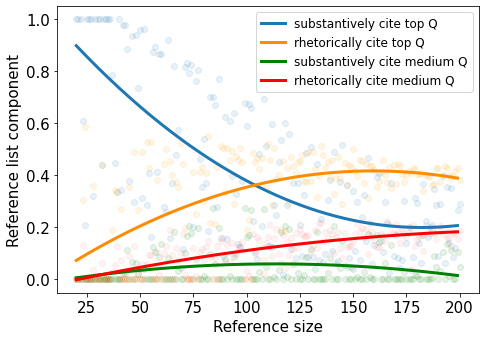

In [ ]:
import matplotlib.pyplot as plt  
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})
import numpy
from scipy.optimize import curve_fit
from numpy import arange

q=[1.0, 1.0, 1.0, 0.6086956521739131, 0.20833333333333334, 1.0, 1.0, 1.0, 0.32142857142857145, 1.0, 1.0, 1.0, 0.4375, 1.0, 1.0, 1.0, 1.0, 0.7837837837837838, 0.4473684210526316, 0.3333333333333333, 1.0, 0.34146341463414637, 0.9761904761904762, 0.9767441860465116, 0.8863636363636364, 0.37777777777777777, 0.9347826086956522, 0.2978723404255319, 0.9375, 0.7346938775510204, 0.96, 0.3137254901960784, 0.9615384615384616, 0.2830188679245283, 0.4074074074074074, 0.16363636363636364, 0.875, 0.8947368421052632, 0.41379310344827586, 0.864406779661017, 0.8666666666666667, 0.2786885245901639, 0.25806451612903225, 0.9206349206349206, 0.15625, 0.36923076923076925, 0.8181818181818182, 0.47761194029850745, 0.5735294117647058, 0.043478260869565216, 0.11428571428571428, 0.8169014084507042, 0.8333333333333334, 0.7945205479452054, 0.8243243243243243, 0.2, 0.7631578947368421, 0.8051948051948052, 0.46153846153846156, 0.35443037974683544, 0.5375, 0.37037037037037035, 0.18292682926829268, 0.6987951807228916, 0.7023809523809523, 0.6705882352941176, 0.27906976744186046, 0.7701149425287356, 0.1590909090909091, 0.0898876404494382, 0.6222222222222222, 0.15384615384615385, 0.6086956521739131, 0.3978494623655914, 0.6382978723404256, 0.3263157894736842, 0.13541666666666666, 0.12371134020618557, 0.37755102040816324, 0.6767676767676768, 0.59, 0.6732673267326733, 0.6568627450980392, 0.22330097087378642, 0.10576923076923077, 0.0761904761904762, 0.4811320754716981, 0.205607476635514, 0.6944444444444444, 0.5137614678899083, 0.12727272727272726, 0.12612612612612611, 0.5982142857142857, 0.2831858407079646, 0.24561403508771928, 0.45217391304347826, 0.5344827586206896, 0.017094017094017096, 0.6016949152542372, 0.2857142857142857, 0.5583333333333333, 0.11570247933884298, 0.36885245901639346, 0.08130081300813008, 0.3709677419354839, 0.208, 0.0873015873015873, 0.3228346456692913, 0.484375, 0.08527131782945736, 0.5076923076923077, 0.08396946564885496, 0.03787878787878788, 0.44360902255639095, 0.07462686567164178, 0.22962962962962963, 0.0661764705882353, 0.0948905109489051, 0.30434782608695654, 0.381294964028777, 0.10714285714285714, 0.48936170212765956, 0.06338028169014084, 0.06993006993006994, 0.375, 0.5172413793103449, 0.0547945205479452, 0.36054421768707484, 0.08108108108108109, 0.04697986577181208, 0.34, 0.10596026490066225, 0.29605263157894735, 0.0718954248366013, 0.24025974025974026, 0.3225806451612903, 0.14743589743589744, 0.46496815286624205, 0.21518987341772153, 0.05660377358490566, 0.13125, 0.391304347826087, 0.4074074074074074, 0.147239263803681, 0.10365853658536585, 0.296969696969697, 0.21686746987951808, 0.023952095808383235, 0.36904761904761907, 0.08875739644970414, 0.17058823529411765, 0.08187134502923976, 0.040697674418604654, 0.07514450867052024, 0.2988505747126437, 0.13714285714285715, 0.19886363636363635, 0.03389830508474576, 0.08426966292134831, 0.3128491620111732, 0.29444444444444445, 0.13812154696132597, 0.06043956043956044, 0.366120218579235, 0.22282608695652173, 0.16216216216216217, 0.1989247311827957, 0.20855614973262032, 0.34574468085106386, 0.2857142857142857, 0.08947368421052632, 0.2879581151832461, 0.3958333333333333, 0.06217616580310881, 0.3556701030927835, 0.13846153846153847, 0.3520408163265306, 0.08629441624365482, 0.12121212121212122, 0.2663316582914573, 0.29]
s=[0.0, 0.0, 0.0, 0.30434782608695654, 0.5833333333333334, 0.0, 0.0, 0.0, 0.35714285714285715, 0.0, 0.0, 0.0, 0.4375, 0.0, 0.0, 0.0, 0.0, 0.1891891891891892, 0.34210526315789475, 0.3333333333333333, 0.0, 0.2682926829268293, 0.0, 0.0, 0.0, 0.35555555555555557, 0.0, 0.48936170212765956, 0.0, 0.2653061224489796, 0.0, 0.49019607843137253, 0.0, 0.5283018867924528, 0.42592592592592593, 0.5272727272727272, 0.0, 0.0, 0.3793103448275862, 0.05084745762711865, 0.0, 0.4426229508196721, 0.5, 0.0, 0.453125, 0.4, 0.0, 0.373134328358209, 0.35294117647058826, 0.5217391304347826, 0.44285714285714284, 0.19718309859154928, 0.0, 0.0, 0.0, 0.41333333333333333, 0.25, 0.0, 0.41025641025641024, 0.43037974683544306, 0.3, 0.4074074074074074, 0.5487804878048781, 0.21686746987951808, 0.0, 0.21176470588235294, 0.43023255813953487, 0.0, 0.5113636363636364, 0.5056179775280899, 0.3333333333333333, 0.5054945054945055, 0.45652173913043476, 0.4946236559139785, 0.2872340425531915, 0.47368421052631576, 0.4583333333333333, 0.5051546391752577, 0.4489795918367347, 0.0, 0.19, 0.22772277227722773, 0.0, 0.4854368932038835, 0.4519230769230769, 0.4666666666666667, 0.42452830188679247, 0.4672897196261682, 0.07407407407407407, 0.3486238532110092, 0.5181818181818182, 0.4594594594594595, 0.2857142857142857, 0.504424778761062, 0.38596491228070173, 0.4, 0.1896551724137931, 0.452991452991453, 0.1864406779661017, 0.42857142857142855, 0.2916666666666667, 0.47107438016528924, 0.4344262295081967, 0.4065040650406504, 0.45161290322580644, 0.456, 0.47619047619047616, 0.3779527559055118, 0.375, 0.4883720930232558, 0.3769230769230769, 0.48854961832061067, 0.42424242424242425, 0.3157894736842105, 0.39552238805970147, 0.5111111111111111, 0.47794117647058826, 0.4306569343065693, 0.4492753623188406, 0.38848920863309355, 0.45714285714285713, 0.3262411347517731, 0.3873239436619718, 0.46853146853146854, 0.3888888888888889, 0.2896551724137931, 0.4452054794520548, 0.36054421768707484, 0.4391891891891892, 0.42953020134228187, 0.5, 0.41721854304635764, 0.39473684210526316, 0.45751633986928103, 0.45454545454545453, 0.36774193548387096, 0.4423076923076923, 0.31210191082802546, 0.43670886075949367, 0.4339622641509434, 0.41875, 0.35403726708074534, 0.3765432098765432, 0.4110429447852761, 0.4573170731707317, 0.4, 0.37349397590361444, 0.4311377245508982, 0.35119047619047616, 0.4378698224852071, 0.36470588235294116, 0.4444444444444444, 0.436046511627907, 0.4046242774566474, 0.3735632183908046, 0.4, 0.4147727272727273, 0.4067796610169492, 0.42696629213483145, 0.4245810055865922, 0.40555555555555556, 0.40331491712707185, 0.4065934065934066, 0.33879781420765026, 0.40217391304347827, 0.3945945945945946, 0.3978494623655914, 0.36363636363636365, 0.3670212765957447, 0.42857142857142855, 0.4263157894736842, 0.3717277486910995, 0.4010416666666667, 0.43523316062176165, 0.42783505154639173, 0.4, 0.3877551020408163, 0.39593908629441626, 0.41414141414141414, 0.4271356783919598, 0.38]
r=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.023809523809523808, 0.023255813953488372, 0.11363636363636363, 0.0, 0.06521739130434782, 0.0, 0.0625, 0.02040816326530612, 0.04, 0.0, 0.038461538461538464, 0.0, 0.0, 0.0, 0.125, 0.10526315789473684, 0.0, 0.0847457627118644, 0.13333333333333333, 0.0, 0.0, 0.07936507936507936, 0.0, 0.0, 0.18181818181818182, 0.0, 0.029411764705882353, 0.0, 0.0, 0.09859154929577464, 0.16666666666666666, 0.2054794520547945, 0.17567567567567569, 0.0, 0.07894736842105263, 0.19480519480519481, 0.0, 0.0, 0.0125, 0.0, 0.0, 0.0963855421686747, 0.27380952380952384, 0.058823529411764705, 0.0, 0.19540229885057472, 0.0, 0.0, 0.07777777777777778, 0.0, 0.010869565217391304, 0.0, 0.0851063829787234, 0.0, 0.0, 0.0, 0.0, 0.2727272727272727, 0.16, 0.16831683168316833, 0.2647058823529412, 0.0, 0.0, 0.0, 0.02830188679245283, 0.0, 0.26851851851851855, 0.045871559633027525, 0.0, 0.0, 0.125, 0.008849557522123894, 0.0, 0.034782608695652174, 0.1810344827586207, 0.0, 0.2033898305084746, 0.008403361344537815, 0.19166666666666668, 0.0, 0.05737704918032787, 0.0, 0.024193548387096774, 0.0, 0.0, 0.015748031496062992, 0.0859375, 0.0, 0.11538461538461539, 0.0, 0.0, 0.18045112781954886, 0.0, 0.0, 0.0, 0.0, 0.021739130434782608, 0.07913669064748201, 0.0, 0.20567375886524822, 0.0, 0.0, 0.041666666666666664, 0.14482758620689656, 0.0, 0.047619047619047616, 0.0, 0.0, 0.04, 0.0, 0.006578947368421052, 0.0, 0.0, 0.025806451612903226, 0.0, 0.17197452229299362, 0.006329113924050633, 0.0, 0.0, 0.16770186335403728, 0.1419753086419753, 0.0, 0.0, 0.06060606060606061, 0.0, 0.0, 0.13095238095238096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.028735632183908046, 0.0, 0.0, 0.0, 0.0, 0.01675977653631285, 0.011111111111111112, 0.0, 0.0, 0.16939890710382513, 0.0, 0.0, 0.0, 0.0053475935828877, 0.09042553191489362, 0.047619047619047616, 0.0, 0.031413612565445025, 0.10416666666666667, 0.0, 0.13402061855670103, 0.010256410256410256, 0.11224489795918367, 0.0, 0.0, 0.10552763819095477, 0.045]
z=[0.0, 0.0, 0.0, 0.13043478260869565, 0.0, 0.0, 0.0, 0.0, 0.03571428571428571, 0.0, 0.0, 0.0, 0.0625, 0.0, 0.0, 0.0, 0.0, 0.02702702702702703, 0.05263157894736842, 0.1282051282051282, 0.0, 0.07317073170731707, 0.0, 0.0, 0.0, 0.08888888888888889, 0.0, 0.1276595744680851, 0.0, 0.02040816326530612, 0.0, 0.058823529411764705, 0.0, 0.05660377358490566, 0.09259259259259259, 0.09090909090909091, 0.0, 0.0, 0.10344827586206896, 0.01694915254237288, 0.0, 0.09836065573770492, 0.12903225806451613, 0.0, 0.1875, 0.09230769230769231, 0.0, 0.11940298507462686, 0.07352941176470588, 0.10144927536231885, 0.17142857142857143, 0.014084507042253521, 0.0, 0.0, 0.0, 0.12, 0.013157894736842105, 0.0, 0.10256410256410256, 0.11392405063291139, 0.075, 0.12345679012345678, 0.14634146341463414, 0.08433734939759036, 0.0, 0.08235294117647059, 0.12790697674418605, 0.0, 0.14772727272727273, 0.15730337078651685, 0.06666666666666667, 0.13186813186813187, 0.06521739130434782, 0.13978494623655913, 0.09574468085106383, 0.09473684210526316, 0.125, 0.12371134020618557, 0.14285714285714285, 0.0, 0.03, 0.009900990099009901, 0.0, 0.17475728155339806, 0.09615384615384616, 0.1619047619047619, 0.1509433962264151, 0.12149532710280374, 0.018518518518518517, 0.13761467889908258, 0.16363636363636364, 0.2072072072072072, 0.08928571428571429, 0.1592920353982301, 0.19298245614035087, 0.09565217391304348, 0.0603448275862069, 0.17094017094017094, 0.0423728813559322, 0.14285714285714285, 0.09166666666666666, 0.15702479338842976, 0.11475409836065574, 0.17886178861788618, 0.12096774193548387, 0.192, 0.1746031746031746, 0.16535433070866143, 0.1640625, 0.17054263565891473, 0.1076923076923077, 0.1297709923664122, 0.1893939393939394, 0.12030075187969924, 0.21641791044776118, 0.21481481481481482, 0.14705882352941177, 0.18248175182481752, 0.15942028985507245, 0.18705035971223022, 0.17142857142857143, 0.09929078014184398, 0.1619718309859155, 0.18181818181818182, 0.11805555555555555, 0.08275862068965517, 0.1780821917808219, 0.12244897959183673, 0.12837837837837837, 0.12751677852348994, 0.14666666666666667, 0.17218543046357615, 0.21052631578947367, 0.1830065359477124, 0.19480519480519481, 0.16129032258064516, 0.19230769230769232, 0.09554140127388536, 0.17088607594936708, 0.18238993710691823, 0.15, 0.12422360248447205, 0.12345679012345678, 0.17177914110429449, 0.16463414634146342, 0.14545454545454545, 0.22289156626506024, 0.20958083832335328, 0.17857142857142858, 0.17751479289940827, 0.21176470588235294, 0.18128654970760233, 0.13953488372093023, 0.18497109826589594, 0.1781609195402299, 0.16, 0.17613636363636365, 0.1977401129943503, 0.20786516853932585, 0.12849162011173185, 0.15, 0.16574585635359115, 0.17032967032967034, 0.1092896174863388, 0.20652173913043478, 0.1891891891891892, 0.17204301075268819, 0.18716577540106952, 0.17553191489361702, 0.15343915343915343, 0.18947368421052632, 0.20418848167539266, 0.171875, 0.19170984455958548, 0.15979381443298968, 0.15897435897435896, 0.12755102040816327, 0.17766497461928935, 0.17676767676767677, 0.15577889447236182, 0.185]

x= numpy.arange(20, 201, 1)

# define the true objective function
def objective(x, a, b, c):
	return a * x **2 + x* b + c

popt1, _ = curve_fit(objective, x, q)
popt2, _ = curve_fit(objective, x, s)
popt3, _ = curve_fit(objective, x, r)
popt4, _ = curve_fit(objective, x, z)
# summarize the parameter values
a, b, c = popt1
d, e, f =popt2
g, h, i =popt3
j, k, l =popt4
# plot input vs output
plt.scatter(x, q, marker='o',norm =0, color='#1f77b4', alpha =0.1)
plt.scatter(x, s, marker='o',norm =0, color='orange', alpha =0.1)
plt.scatter(x, r, marker='o',norm =0, color='green', alpha =0.1)
plt.scatter(x, z, marker='o',norm =0, color='red', alpha =0.05)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line1 = objective(x_line, a, b, c)
y_line2  = objective(x_line, d, e, f)
y_line3  = objective(x_line, g, h, i)
y_line4  = objective(x_line, j, k, l)
# create a line plot for the mapping function
plt.plot(x_line, y_line1, '-', color='#1f77b4', label='substantively cite top Q', linewidth=3)
plt.plot(x_line, y_line2, '-', color='darkorange', label='rhetorically cite top Q',linewidth=3)
plt.plot(x_line, y_line3, '-', color='green', label='substantively cite medium Q',linewidth=3)
plt.plot(x_line, y_line4, '-', color='red',label='rhetorically cite medium Q', linewidth=3)
plt.xlabel('Reference size')
plt.ylabel('Reference list component')
plt.legend(loc='upper right', prop={'size': 12})
plt.show()

paper= 600; ref=35; noise =0.1; fit =0.2; shape =5; threshold 0.3-0.7; weightq the signal-based gain in rhetoric value 0.3

<Figure size 540x1080 with 0 Axes>

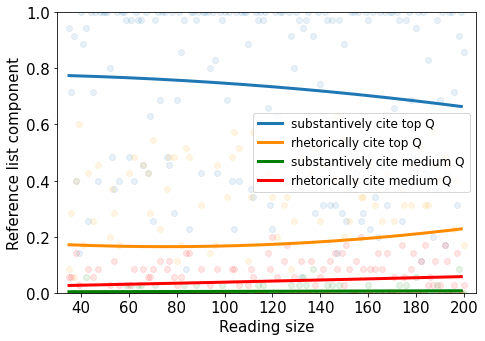

In [ ]:
q=[0.9428571428571428, 0.7142857142857143, 0.9142857142857143, 0.4, 0.14285714285714285, 1.0, 0.8857142857142857, 0.9428571428571428, 0.2571428571428571, 1.0, 0.7142857142857143, 1.0, 0.4, 1.0, 1.0, 1.0, 1.0, 0.8, 0.4857142857142857, 0.37142857142857144, 1.0, 0.4, 1.0, 1.0, 0.9714285714285714, 0.4857142857142857, 0.9714285714285714, 0.4, 1.0, 0.9714285714285714, 0.9714285714285714, 0.45714285714285713, 1.0, 0.42857142857142855, 0.6285714285714286, 0.2571428571428571, 0.9714285714285714, 1.0, 0.6857142857142857, 1.0, 1.0, 0.4857142857142857, 0.45714285714285713, 1.0, 0.2857142857142857, 0.6857142857142857, 1.0, 0.8571428571428571, 0.9714285714285714, 0.08571428571428572, 0.22857142857142856, 1.0, 1.0, 0.9714285714285714, 1.0, 0.42857142857142855, 1.0, 1.0, 1.0, 0.8, 1.0, 0.8285714285714286, 0.42857142857142855, 1.0, 0.9714285714285714, 1.0, 0.6857142857142857, 1.0, 0.4, 0.22857142857142856, 1.0, 0.4, 1.0, 1.0, 1.0, 0.8857142857142857, 0.37142857142857144, 0.34285714285714286, 1.0, 0.9714285714285714, 1.0, 0.9714285714285714, 1.0, 0.6571428571428571, 0.3142857142857143, 0.22857142857142856, 1.0, 0.6285714285714286, 1.0, 1.0, 0.4, 0.4, 1.0, 0.9142857142857143, 0.8, 1.0, 0.9714285714285714, 0.05714285714285714, 0.9428571428571428, 0.9714285714285714, 1.0, 0.4, 0.9142857142857143, 0.2857142857142857, 1.0, 0.7428571428571429, 0.3142857142857143, 1.0, 0.9714285714285714, 0.3142857142857143, 0.9714285714285714, 0.3142857142857143, 0.14285714285714285, 0.9714285714285714, 0.2857142857142857, 0.8857142857142857, 0.2571428571428571, 0.37142857142857144, 1.0, 1.0, 0.42857142857142855, 1.0, 0.2571428571428571, 0.2857142857142857, 1.0, 0.9714285714285714, 0.22857142857142856, 1.0, 0.34285714285714286, 0.2, 1.0, 0.45714285714285713, 1.0, 0.3142857142857143, 1.0, 1.0, 0.6571428571428571, 1.0, 0.9714285714285714, 0.2571428571428571, 0.6, 0.9714285714285714, 1.0, 0.6857142857142857, 0.4857142857142857, 0.9428571428571428, 1.0, 0.11428571428571428, 1.0, 0.42857142857142855, 0.8285714285714286, 0.4, 0.2, 0.37142857142857144, 0.9714285714285714, 0.6857142857142857, 1.0, 0.17142857142857143, 0.42857142857142855, 1.0, 1.0, 0.7142857142857143, 0.3142857142857143, 0.9142857142857143, 1.0, 0.8571428571428571]
s=[0.08571428571428572, 0.2857142857142857, 0.05714285714285714, 0.4, 0.6, 0.0, 0.17142857142857143, 0.0, 0.42857142857142855, 0.0, 0.2571428571428571, 0.0, 0.45714285714285713, 0.0, 0.0, 0.0, 0.0, 0.2, 0.37142857142857144, 0.2857142857142857, 0.0, 0.17142857142857143, 0.0, 0.0, 0.0, 0.42857142857142855, 0.0, 0.4857142857142857, 0.0, 0.0, 0.0, 0.45714285714285713, 0.0, 0.42857142857142855, 0.2857142857142857, 0.5428571428571428, 0.0, 0.0, 0.22857142857142856, 0.0, 0.0, 0.37142857142857144, 0.4857142857142857, 0.0, 0.4857142857142857, 0.11428571428571428, 0.0, 0.17142857142857143, 0.0, 0.5142857142857142, 0.4857142857142857, 0.0, 0.0, 0.0, 0.0, 0.3142857142857143, 0.0, 0.0, 0.0, 0.14285714285714285, 0.0, 0.17142857142857143, 0.45714285714285713, 0.0, 0.0, 0.0, 0.34285714285714286, 0.0, 0.4857142857142857, 0.5714285714285714, 0.0, 0.5142857142857142, 0.0, 0.0, 0.0, 0.11428571428571428, 0.34285714285714286, 0.5714285714285714, 0.0, 0.0, 0.0, 0.0, 0.0, 0.42857142857142855, 0.4, 0.34285714285714286, 0.0, 0.2, 0.0, 0.0, 0.3142857142857143, 0.34285714285714286, 0.0, 0.08571428571428572, 0.2571428571428571, 0.0, 0.0, 0.4857142857142857, 0.0, 0.0, 0.0, 0.42857142857142855, 0.0, 0.5142857142857142, 0.0, 0.2571428571428571, 0.45714285714285713, 0.0, 0.0, 0.5428571428571428, 0.0, 0.4, 0.6285714285714286, 0.0, 0.5428571428571428, 0.2, 0.37142857142857144, 0.2571428571428571, 0.0, 0.0, 0.4, 0.0, 0.34285714285714286, 0.34285714285714286, 0.0, 0.0, 0.45714285714285713, 0.0, 0.3142857142857143, 0.37142857142857144, 0.0, 0.2571428571428571, 0.0, 0.42857142857142855, 0.0, 0.0, 0.2571428571428571, 0.0, 0.0, 0.37142857142857144, 0.3142857142857143, 0.0, 0.0, 0.3142857142857143, 0.45714285714285713, 0.0, 0.0, 0.5142857142857142, 0.0, 0.3142857142857143, 0.3142857142857143, 0.4, 0.5714285714285714, 0.45714285714285713, 0.0, 0.4, 0.0, 0.4857142857142857, 0.45714285714285713, 0.0, 0.0, 0.22857142857142856, 0.4, 0.0, 0.0, 0.17142857142857143]
r=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05714285714285714, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02857142857142857, 0.0, 0.02857142857142857, 0.0, 0.0, 0.02857142857142857, 0.02857142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02857142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02857142857142857, 0.0, 0.0, 0.0, 0.0, 0.02857142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02857142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02857142857142857, 0.0, 0.02857142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02857142857142857, 0.0, 0.0, 0.02857142857142857, 0.0, 0.05714285714285714, 0.02857142857142857, 0.0, 0.0, 0.08571428571428572, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02857142857142857, 0.0, 0.02857142857142857, 0.0, 0.0, 0.02857142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02857142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02857142857142857, 0.0, 0.0, 0.02857142857142857, 0.0, 0.0, 0.0, 0.05714285714285714, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02857142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08571428571428572, 0.0, 0.0]
z=[0.05714285714285714, 0.05714285714285714, 0.0, 0.14285714285714285, 0.02857142857142857, 0.0, 0.0, 0.0, 0.08571428571428572, 0.0, 0.05714285714285714, 0.0, 0.08571428571428572, 0.0, 0.0, 0.0, 0.0, 0.02857142857142857, 0.0, 0.11428571428571428, 0.0, 0.02857142857142857, 0.0, 0.0, 0.0, 0.02857142857142857, 0.0, 0.08571428571428572, 0.0, 0.0, 0.0, 0.08571428571428572, 0.0, 0.05714285714285714, 0.05714285714285714, 0.08571428571428572, 0.0, 0.0, 0.11428571428571428, 0.0, 0.0, 0.08571428571428572, 0.11428571428571428, 0.0, 0.05714285714285714, 0.02857142857142857, 0.0, 0.05714285714285714, 0.0, 0.14285714285714285, 0.14285714285714285, 0.0, 0.0, 0.0, 0.0, 0.08571428571428572, 0.0, 0.0, 0.0, 0.02857142857142857, 0.0, 0.0, 0.08571428571428572, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08571428571428572, 0.08571428571428572, 0.0, 0.02857142857142857, 0.0, 0.0, 0.0, 0.02857142857142857, 0.08571428571428572, 0.05714285714285714, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14285714285714285, 0.08571428571428572, 0.2, 0.0, 0.05714285714285714, 0.0, 0.0, 0.11428571428571428, 0.17142857142857143, 0.0, 0.0, 0.05714285714285714, 0.0, 0.0, 0.11428571428571428, 0.0, 0.0, 0.0, 0.11428571428571428, 0.0, 0.02857142857142857, 0.0, 0.05714285714285714, 0.08571428571428572, 0.0, 0.0, 0.11428571428571428, 0.0, 0.14285714285714285, 0.08571428571428572, 0.0, 0.14285714285714285, 0.02857142857142857, 0.17142857142857143, 0.08571428571428572, 0.0, 0.0, 0.11428571428571428, 0.0, 0.2, 0.08571428571428572, 0.0, 0.0, 0.08571428571428572, 0.0, 0.08571428571428572, 0.14285714285714285, 0.0, 0.08571428571428572, 0.0, 0.14285714285714285, 0.0, 0.0, 0.05714285714285714, 0.0, 0.0, 0.17142857142857143, 0.05714285714285714, 0.0, 0.0, 0.08571428571428572, 0.14285714285714285, 0.0, 0.0, 0.11428571428571428, 0.0, 0.17142857142857143, 0.02857142857142857, 0.05714285714285714, 0.02857142857142857, 0.11428571428571428, 0.0, 0.02857142857142857, 0.0, 0.17142857142857143, 0.11428571428571428, 0.0, 0.0, 0.02857142857142857, 0.14285714285714285, 0.0, 0.0, 0.02857142857142857]

import matplotlib.pyplot as plt  
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})
import numpy
from scipy.optimize import curve_fit
from numpy import arange

x= numpy.arange(35, 201, 1)

# define the true objective function
def objective(x, a, b, c):
	return a * x **2+ x* b + c

popt1, _ = curve_fit(objective, x, q)
popt2, _ = curve_fit(objective, x, s)
popt3, _ = curve_fit(objective, x, r)
popt4, _ = curve_fit(objective, x, z)
# summarize the parameter values
a, b, c = popt1
d, e, f =popt2
g, h, i =popt3
j, k, l =popt4
# plot input vs output
plt.scatter(x, q, marker='o',norm =0, color='#1f77b4', alpha =0.1)
plt.scatter(x, s, marker='o',norm =0, color='orange', alpha =0.1)
plt.scatter(x, r, marker='o',norm =0, color='green', alpha =0.1)
plt.scatter(x, z, marker='o',norm =0, color='red', alpha =0.1)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line1 = objective(x_line, a, b, c)
y_line2  = objective(x_line, d, e, f)
y_line3  = objective(x_line, g, h, i)
y_line4  = objective(x_line, j, k, l)
# create a line plot for the mapping function
plt.plot(x_line, y_line1, '-', color='#1f77b4', label='substantively cite top Q', linewidth=3)
plt.plot(x_line, y_line2, '-', color='darkorange', label='rhetorically cite top Q',linewidth=3)
plt.plot(x_line, y_line3, '-', color='green', label='substantively cite medium Q',linewidth=3)
plt.plot(x_line, y_line4, '-', color='red',label='rhetorically cite medium Q', linewidth=3)
plt.xlabel('Reading size')
plt.ylabel('Reference list component')
plt.legend(loc='center right', prop={'size': 12})
plt.ylim(0,1)
plt.xlim(30,205)
plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


<Figure size 540x468 with 0 Axes>

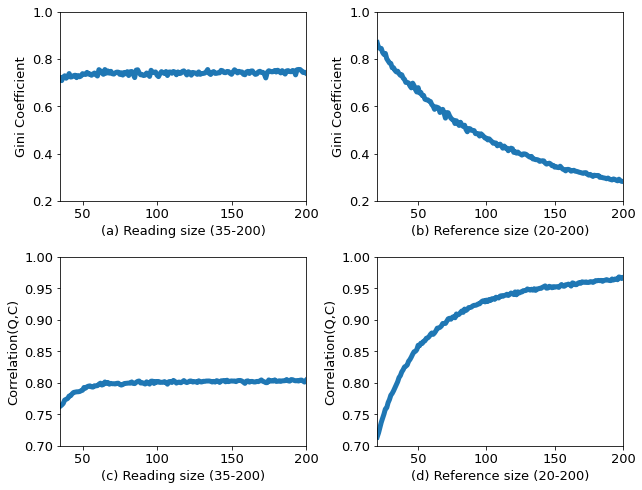

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
test = plt.figure()
fig, ax = plt.subplots(figsize=(9, 7))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 13})
import numpy
data1 =pd.read_csv('20-200.csv',error_bad_lines=False, engine="python")
data2 =pd.read_csv('35-200.csv',error_bad_lines=False, engine="python")
x1= numpy.arange(20, 201, 1)
x2= numpy.arange(35, 201, 1)

plt.subplot(2, 2, 1)
d= data2['Read 35-200 Gini']
plt.plot(x2, d,  linewidth =5)
plt.xlabel('(a) Reading size (35-200)')
plt.ylabel('Gini Coefficient')
plt.ylim(0.2,1)
plt.xlim(35,200)
#plt.title("The impact of reading size (35-200) on inequality")

plt.subplot(2, 2, 2)
b= data1['Ref 20-200 Gini']
plt.plot(x1, b,  linewidth =5)
plt.xlabel('(b) Reference size (20-200)')
plt.ylabel('Gini Coefficient')
plt.xlim(20,200)
plt.ylim(0.2,1)
#plt.title("The impact of reference size (20-200) on inequality")

plt.subplot(2, 2, 3)
c= data2['Read 35-200 corr']
plt.plot(x2, c,  linewidth =5)
plt.xlabel('(c) Reading size (35-200)')
plt.ylabel('Correlation(Q,C)')
plt.ylim(0.7,1)
plt.xlim(35,200)
#plt.title("The impact of reading size (35-200) on corr(Q, C)")

plt.subplot(2, 2, 4)
a= data1['Ref 20-200 corr']
plt.plot(x1, a,  linewidth =5)
plt.xlabel('(d) Reference size (20-200)')
plt.ylabel('Correlation(Q,C)')
plt.ylim(0.7,1)
plt.xlim(20,200)
#plt.title("The impact of reference size (20-200) on corr(Q, C)")
plt.show()

paper= 300; noise =0.1; fit =0.2; shape =5; threshold 0.3-0.7; weightq the signal-based gain in rhetoric value 0.3

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


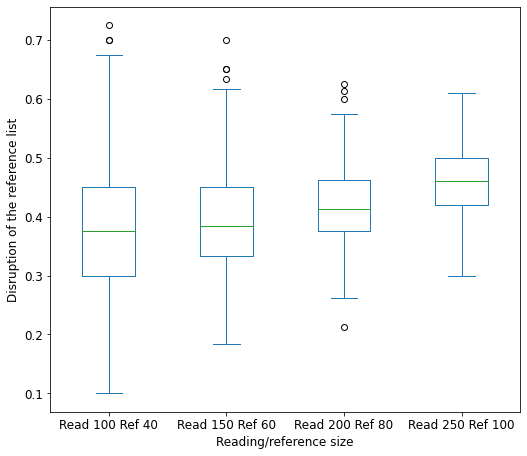

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = [7.50, 6.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 12})

data =pd.read_csv('ref_disruption.csv',error_bad_lines=False, engine="python")
# Creating axes instance
ax = data[['Read 100 Ref 40','Read 150 Ref 60','Read 200 Ref 80','Read 250 Ref 100']].plot(kind='box')
plt.xlabel('Reading/reference size')
plt.ylabel('Disruption of the reference list')
plt.show()


# Hetero Null

In [ ]:
#model 5: heterogeneous null
#rank-based
import random
import numpy as np
random.seed(100000)
np.random.seed(100000)
import matplotlib.pyplot as plt  
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True
import scipy.stats as stats
from scipy.stats import pearsonr
import pandas as pd
import seaborn as sns
from scipy.stats import norm
plt.rcParams.update({'font.size': 20})

def gini_coefficient(x):
    """Compute Gini coefficient of array of values"""
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x)**2 * np.mean(x))

def f(a,N):
    """Get indices of the top N values of a list"""
    return np.argsort(a)[::-1][:N]

#args you need to use
tmax= 1000#time steps
#-----------------------------
num = 300#paper population
nummax=300
#-----------------------------
reference =  40#expected reference size, need to vary
refmax =40
#-----------------------------
reading =  100#reading size, need to vary
readingmax=100
#-----------------------------
noise =0.1
#-----------------------------
fit =0.2

for num in range(num, nummax+1):
  normative=np.random.beta(1, 5, size=num)
  qrank =[]
  qrank = list(np.argsort(normative)[-(num):][::-1])
  top1q=qrank[0:100]#index
  top2q=qrank[100:200]#index
  
  list1 =[]
  list3=[]
  weight=0.001
  for reference in range(reference, refmax+1):
  #for reading in range(reading, readingmax+1):

    cite_population = [0]*num #citation count over the entire paper population
    chunk =[]
    #reading = (int)(2.5*reference)

    for t in range(1, tmax+1):

      noise_list=np.random.normal(0, noise, num)

      fit_list=[]
      for i in range(num):
        fit_list.append(random.uniform(-fit, fit))

      signal =[]
      for i in range(num):
        signal.append(normative[i]+ fit_list[i] + weight * cite_population[i] + noise_list[i]) 
      for i in range(num):
        if (signal[i] >2):
          signal[i] =2
        if (signal[i] <0):
          signal[i] =0

      reading_index = list(np.argsort(signal)[-(reading):][::-1])
    
      norm_list =[]
      for i in range(len(reading_index)):
        norm_list.append(normative[reading_index[i]] + fit_list[reading_index[i]])
      for i in range(len(reading_index)):
        if (norm_list[i]>1):
          norm_list[i]=1
        if (signal[i] <0):
          signal[i] =0

      normative_cite=[]# normative citation list
      cite = list(f(norm_list, reference))
      for i in range(len(cite)):
        cite_population[reading_index[cite[i]]]= cite_population[reading_index[cite[i]]]+1
        normative_cite.append(reading_index[cite[i]])

      overall_cite = normative_cite 
      chunk.append(overall_cite)
        
#here, experiments--------------------------------------------------------------
    print(*cite_population, sep='\n')
    #top1=0
    #for i in range(100):
     # if ((top1q[i] in (normative_cite)) == True):
     #   top1 = top1+1
    #list1.append(top1/reference)

    #top3=0
    #for i in range(100):
    #  if ((top2q[i] in (normative_cite )) == True):
    #    top3 = top3+1
    #list3.append(top3/reference)

    #print(*cite_population, sep='\n')
    #print(gini_coefficient(np.array(cite_population)))
    #corr1, _ = stats.pearsonr(normative, cite_population)
    #print(corr1)
    #corr2, _ = stats.pearsonr(base_rhe, cite_population)
    #print(corr2)
  #print(list1)
  #print(list3)

noise =0.1; fit =0.2; shape =5; threshold 0.3-0.7; weightq the signal-based gain in rhetoric value 0.3

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


<Figure size 540x396 with 0 Axes>

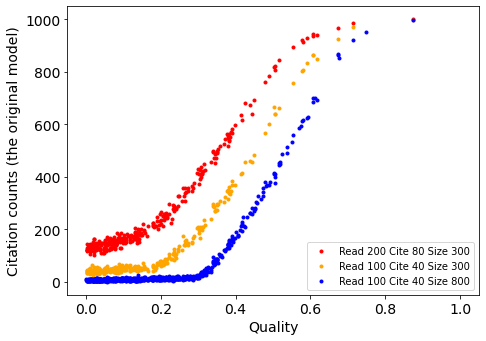

In [ ]:
import matplotlib.pyplot as plt  
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})
import pandas as pd
data1=pd.read_csv('homocitation.csv',error_bad_lines=False, engine="python")
data2=pd.read_csv('800count.csv',error_bad_lines=False, engine="python")
x1 = data1['Quality']
y1 = data1['Count2 (100-40)']
x2 = data2['Quality']
y2 = data2['Count']
x1 = data1['Quality']
y3 = data1['Count (200-80)']
plt.xlabel('Quality')
plt.ylabel('Citation counts (the original model)')
plt.scatter(x1, y3, marker='.',norm =0, color='red', alpha =1, label='Read 200 Cite 80 Size 300')
plt.scatter(x1, y1, marker='.',norm =0, color='orange', alpha =1, label='Read 100 Cite 40 Size 300')
plt.scatter(x2, y2, marker='.',norm =0, color='blue', alpha =1, label='Read 100 Cite 40 Size 800')
plt.legend(loc='lower right', prop={'size': 10})
plt.xlim(-0.05,1.05)
plt.show()

<Figure size 540x1080 with 0 Axes>

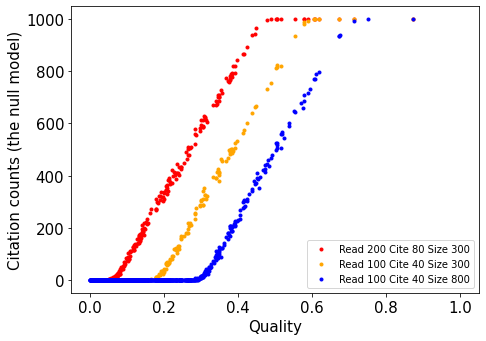

In [ ]:
import matplotlib.pyplot as plt  
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})
import pandas as pd
data1=pd.read_csv('nullcount.csv',error_bad_lines=False, engine="python")
data2=pd.read_csv('800count.csv',error_bad_lines=False, engine="python")
x1 = data1['Quality']
y1 = data1['Count (100-40)']
x1 = data1['Quality']
y3 = data1['Count (200-80)']
x2 = data2['Quality']
y2 = data2['Count-null']
plt.xlabel('Quality')
plt.ylabel('Citation counts (the null model)')
plt.scatter(x1, y3, marker='.',norm =0, color='red', alpha =1, label='Read 200 Cite 80 Size 300')
plt.scatter(x1, y1, marker='.',norm =0, color='orange', alpha =1, label='Read 100 Cite 40 Size 300')
plt.scatter(x2, y2, marker='.',norm =0, color='blue', alpha =1, label='Read 100 Cite 40 Size 800')
plt.legend(loc='lower right', prop={'size': 10})
plt.xlim(-0.05,1.05)
plt.show()

#here add a table
say, the top 5% of highly cited papers share more than 60% of all citations

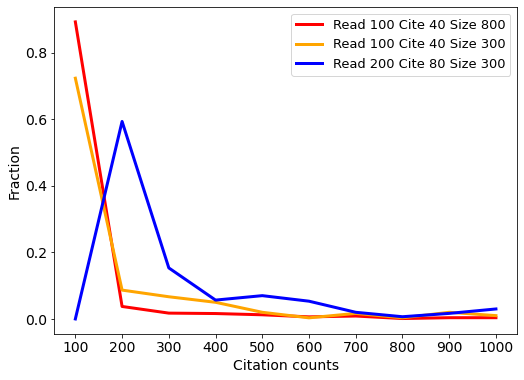

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 14})
names = ['100', '200',  '300' ,'400' ,'500' ,'600', '700' ,'800', '900', '1000']
values1 = [714/800,30/800,14/800,13/800,10/800,5/800,7/800,1/800,3/800,3/800]
values3 = [217/300,26/300,20/300,15/300,6/300,1/300,5/300,1/300,6/300,3/300]
values4 = [0/300,178/300,46/300,17/300,21/300,16/300,6/300,2/300,5/300,9/300]
plt.xlabel('Citation counts')
plt.ylabel('Fraction')
plt.plot(names, values1, linewidth='3', color ='r', label ='Read 100 Cite 40 Size 800')
plt.plot(names, values3, linewidth='3', color ='orange', label ='Read 100 Cite 40 Size 300')
plt.plot(names, values4, linewidth='3', color ='b', label ='Read 200 Cite 80 Size 300')
plt.legend(loc='upper right', prop={'size': 13})
plt.show()

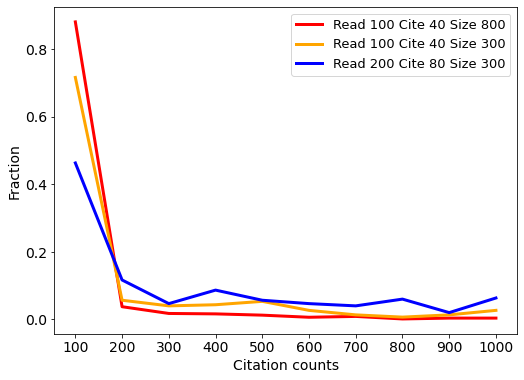

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 14})
names = ['100', '200',  '300' ,'400' ,'500' ,'600', '700' ,'800', '900', '1000']
values2 = [705/800,30/800,14/800,13/800,10/800,5/800,7/800,1/800,3/800,3/800]#null 100-40-800
values3 = [215/300,17/300,12/300,13/300,16/300,8/300,4/300,2/300,4/300,8/300]
values4 = [139/300,35/300,14/300,26/300,17/300,14/300,12/300,18/300,6/300,19/300]
plt.xlabel('Citation counts')
plt.ylabel('Fraction')
plt.plot(names, values2, linewidth='3', color ='r', label ='Read 100 Cite 40 Size 800')
plt.plot(names, values3, linewidth='3', color ='orange', label ='Read 100 Cite 40 Size 300')
plt.plot(names, values4, linewidth='3', color ='b', label ='Read 200 Cite 80 Size 300')
plt.legend(loc='upper right', prop={'size': 13})
plt.show()

ref =35; read=100; noise =0.1; fit =0.2; shape =5; threshold 0.3-0.7; weightq the signal-based gain in rhetoric value 0.3

<Figure size 540x1080 with 0 Axes>

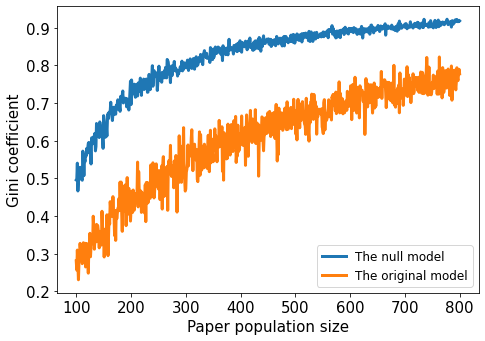

In [ ]:
import matplotlib.pyplot as plt  
import pandas as pd
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})
import numpy
data =pd.read_csv('ginicorr2.csv',error_bad_lines=False, engine="python")
x= numpy.arange(100, 801, 1)
a=data['Null - Gini']
c=data['Original - Gini']
plt.xlabel('Paper population size')
plt.ylabel('Gini coefficient')
plt.plot(x, a, label='The null model', linewidth =3)
plt.plot(x, c, label='The original model', linewidth =3)
a=data['Null - Gini']
c=data['Original - Gini']
plt.xlabel('Paper population size')
plt.ylabel('Gini coefficient')
plt.plot(x, a, label='The null model', linewidth =3)
plt.plot(x, c, label='The original model', linewidth =3)
plt.legend(loc='lower right', prop={'size': 12})
plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


<Figure size 540x1080 with 0 Axes>

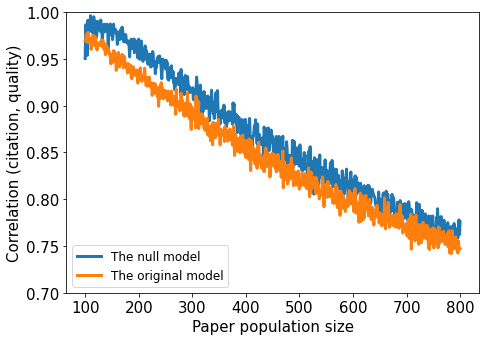

In [ ]:
import matplotlib.pyplot as plt  
import pandas as pd
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})
import numpy
data =pd.read_csv('ginicorr2.csv',error_bad_lines=False, engine="python")
x= numpy.arange(100, 801, 1)
b= data['Null - Corr']
d= data['Original - Corr']
plt.xlabel('Paper population size')
plt.ylabel('Correlation (citation, quality)')
plt.plot(x, b, label='The null model', linewidth =3)
plt.plot(x, d, label='The original model', linewidth =3)
plt.legend(loc='lower left', prop={'size': 12})
plt.ylim(0.7,1)
plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


[[ 1.         -0.89024381]
 [-0.89024381  1.        ]]
[[ 1.         -0.95310281]
 [-0.95310281  1.        ]]


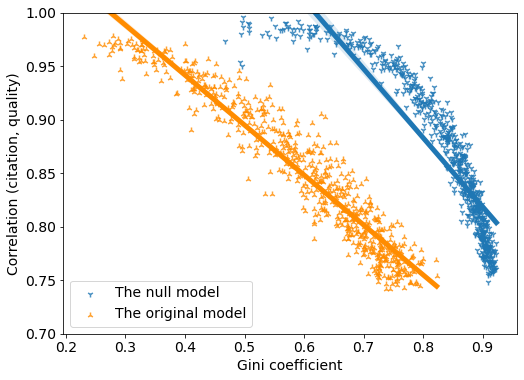

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 14})

data =pd.read_csv('ginicorr2.csv',error_bad_lines=False, engine="python")
a=data['Null - Gini']
c=data['Original - Gini']
b= data['Null - Corr']
d= data['Original - Corr']

sns.regplot(x=a,y=b, data=data,
            marker='1', color='#1f77b4',  line_kws={'linewidth':5}, label='The null model')
ax = sns.regplot(x=c,y=d, data=data,
            marker='2', color='darkorange',  line_kws={'linewidth':5}, label ='The original model')
ax.set(xlabel='Gini coefficient', ylabel='Correlation (citation, quality)')
ax.legend(loc="best")
plt.ylim(0.7,1)
print(np.corrcoef(a, b))
print(np.corrcoef(c, d))

<div class="markdown-google-sans">

## Homo quality + homo rhetoric
</div>






In [ ]:
#model 1: homogeneous quality + homogeneous rhetoric
#rank-based
threshold =0.5
import random
import numpy as np
random.seed(100000)
np.random.seed(100000)
import matplotlib.pyplot as plt  
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True
import scipy.stats as stats
from scipy.stats import pearsonr
import pandas as pd
import seaborn as sns
from scipy.stats import norm
plt.rcParams.update({'font.size': 20})

def gini_coefficient(x):
    """Compute Gini coefficient of array of values"""
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x)**2 * np.mean(x))

def f(a,N):
    """Get indices of the top N values of a list"""
    return np.argsort(a)[::-1][:N]

#args you need to use
tmax= 1000#time steps
#-----------------------------
num = 300#paper population
nummax=300
#-----------------------------
reference =  100#expected reference size, need to vary
refmax =100
#-----------------------------
reading =  250#reading size, need to vary
readingmax=250
#-----------------------------
noise =0.1

for num in range(num, nummax+1):
  #ICLR 2022: https://github.com/fedebotu/ICLR2022-OpenReviewData
  #ICLR 2021: https://github.com/evanzd/ICLR2021-OpenReviewData
  #ICLR 2020: https://github.com/shaohua0116/ICLR2020-OpenReviewData
  #ICLR 2019: https://github.com/shaohua0116/ICLR2019-OpenReviewData
  #mu, sigma = 0.5, 0.15# for high peak
  #mu, sigma = 0.5, 0.2# for low peak
  #mu, sigma = 0.8, 0.2# for right skewed
  #mu, sigma = 0.2, 0.2# for left skewed
  #lower, upper = 0, 1
  #X1 = stats.truncnorm(
  #  (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
  #normative=list(X1.rvs(num))
  normative=np.random.beta(1, 5, size=num)
  qrank =[]
  qrank = list(np.argsort(normative)[-(num):][::-1])
  #n, bins, patches = plt.hist(normative, 90, facecolor='b', alpha=1, histtype="stepfilled")
  #plt.xlabel('Value')
  #plt.ylabel('Number')
  #plt.xlim(-0.05, 1.05)
  #plt.grid(False)
  #plt.show()

#-------------------------------------------------------------------------------
  base_rhe=np.random.beta(1, 5, size=num)
  rrank =[]
  rrank = list(np.argsort(base_rhe)[-(num):][::-1])

  #move to the model
  weight=0.001 #the weight of citation count on perceived quality
  weightq =0.3 #the signal-based gain in rhetoric value

  list1=[]
  list2=[]
  list3=[]
  list4=[]

  for reference in range(reference, refmax+1):
  #for reading in range(reading, readingmax+1):
  
    #reading = (int)(reference*2.5)

    top1q=qrank[0:100]#index
    top2q=qrank[100:200]#index

    top1r=rrank[0:100]#index
    top2r=rrank[100:200]#index

    cite_population = [0]*num #citation count over the entire paper population
    rhe_list=[0]*num #rhetoric value
    chunk =[]

    for t in range(1, tmax+1):

      noise_list=np.random.normal(0, noise, num)

      signal =[]
      for i in range(num):
        signal.append(normative[i]+ weight * cite_population[i] + noise_list[i]) 
      for i in range(num):
        if(signal[i] >2):
          signal[i] =2
        if(signal[i] <0):
          signal[i]=0

      reading_index = list(np.argsort(signal)[-(reading):][::-1])

      for i in range(len(reading_index)):
        rhe_list[reading_index[i]] =base_rhe[reading_index[i]] + weightq*normative[reading_index[i]] + weightq* weight*cite_population[reading_index[i]]
      
      unread=[]
      unread = [i for i in list(range(0,num)) if i not in reading_index]
      for i in range(len(unread)):
        rhe_list[unread[i]] =base_rhe[unread[i]] + weightq*normative[unread[i]] + weightq* weight*cite_population[unread[i]] + weightq* noise_list[unread[i]]
      
      for i in range(num):
        if (rhe_list[i] <0):
          rhe_list[i] =0
        if(rhe_list[i] > 1+ weightq+ weightq):
          rhe_list[i] =1+ weightq+ weightq

      norm_list =[]
      for i in range(len(reading_index)):
        norm_list.append(normative[reading_index[i]])
      
      over_threshold=[]
      for i in range(len(norm_list)):
        if (norm_list[i]> threshold):
          over_threshold.append(reading_index[i])

      normative_cite=[]# normative citation list
      rhetorical_cite=[]# rhetorical citation list
      overlap=[]#overlap

      if (len(over_threshold) >= reference):
        cite = list(f(norm_list, reference))
        for i in range(len(cite)):
          cite_population[reading_index[cite[i]]]= cite_population[reading_index[cite[i]]]+1
          normative_cite.append(reading_index[cite[i]])
        rhetorical_cite=[]
        overlap =[]
        overall_cite = normative_cite + rhetorical_cite + overlap

      else:
        normative_cite = over_threshold.copy()
        rhetoric_no = reference - len(over_threshold)
        new_rhe = rhe_list.copy()
        rhe2=[]
        rhe2 = sorted(new_rhe, reverse = True)
        itr=0
        itr2=0
        while (itr < rhetoric_no):
          if ((new_rhe.index(rhe2[itr2]) in normative_cite) == True):
            normative_cite.remove(new_rhe.index(rhe2[itr2]))
            numitr = new_rhe.index(rhe2[itr2])
            overlap.append(numitr)
            itr2 =itr2+1
          else:
            rhetorical_cite.append(new_rhe.index(rhe2[itr2]))
            itr =itr+1
            itr2 =itr2+1
        overall_cite = normative_cite + rhetorical_cite + overlap
        for i in range(len(overall_cite)):
          cite_population[overall_cite[i]] = cite_population[overall_cite[i]] +1  
      #chunk 
      chunk.append(overall_cite)
        
#here, experiments--------------------------------------------------------------
    print(*cite_population, sep='\n')

    #print(gini_coefficient(np.array(cite_population)))
    #corr1, _ = stats.pearsonr(normative, cite_population)
    #print(corr1)
    #corr2, _ = stats.pearsonr(base_rhe, cite_population)
    #print(corr2)

    #top1=0
    #for i in range(100):
     # if ((top1q[i] in (normative_cite + overlap)) == True):
     #   top1 = top1+1
    #list1.append(top1/reference)

    #top2=0
   # for i in range(100):
    #  if ((top1q[i] in (rhetorical_cite + overlap)) == True):
     #   top2 = top2+1
   # list2.append(top2/reference)

    #top3=0
    #for i in range(100):
    #  if ((top2q[i] in (normative_cite + overlap)) == True):
     #   top3 = top3+1
    #list3.append(top3/reference)

    #top4=0
   # for i in range(100):
     # if ((top2q[i] in (rhetorical_cite + overlap)) == True):
     #   top4 = top4+1
    #list4.append(top4/reference)
    
  #print(list1)
  #print(list2)
  #print(list3)
  #print(list4)

Plot

paper= 300; noise =0.1; shape =5; threshold 0.5; weightq the signal-based gain in rhetoric value 0.3; read 100 ref 40

<Figure size 540x1080 with 0 Axes>

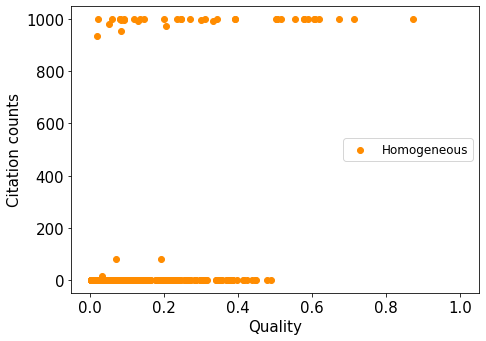

In [ ]:
import matplotlib.pyplot as plt  
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})
import pandas as pd
data =pd.read_csv('homocitation.csv',error_bad_lines=False, engine="python")
x = data['Quality']
y1 = data['Count (100-40)']
y2 = data['Count2 (100-40)']
plt.xlabel('Quality')
plt.ylabel('Citation counts')
plt.scatter(x, y1, marker='o',norm =0, color='darkorange', alpha =1, label='Homogeneous')
#plt.scatter(x, y2, marker='.',norm =0, color='blue', alpha =1, label='Heterogeneous')
plt.legend(loc='center right', prop={'size': 12})
plt.xlim(-0.05,1.05)
plt.show()

#Hetero (fit) quality + homo rhetoric

In [ ]:
#model 3: fit quality + homogeneous rhetoric
#rank-based
import random
import numpy as np
random.seed(100000)
np.random.seed(100000)
import matplotlib.pyplot as plt  
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True
import scipy.stats as stats
from scipy.stats import pearsonr
import pandas as pd
import seaborn as sns
from scipy.stats import norm
plt.rcParams.update({'font.size': 20})

def gini_coefficient(x):
    """Compute Gini coefficient of array of values"""
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x)**2 * np.mean(x))

def f(a,N):
    """Get indices of the top N values of a list"""
    return np.argsort(a)[::-1][:N]

#args you need to use
tmax= 1000#time steps
#-----------------------------
num = 100#paper population
nummax=600
#-----------------------------
reference =  35#expected reference size, need to vary
refmax =35
#-----------------------------
reading =  100#reading size, need to vary
readingmax=100
#-----------------------------
noise =0.1
fit=0.2

for num in range(num, nummax+1):
  #ICLR 2022: https://github.com/fedebotu/ICLR2022-OpenReviewData
  #ICLR 2021: https://github.com/evanzd/ICLR2021-OpenReviewData
  #ICLR 2020: https://github.com/shaohua0116/ICLR2020-OpenReviewData
  #ICLR 2019: https://github.com/shaohua0116/ICLR2019-OpenReviewData
  #mu, sigma = 0.5, 0.15# for high peak
  #mu, sigma = 0.5, 0.2# for low peak
  #mu, sigma = 0.8, 0.2# for right skewed
  #mu, sigma = 0.2, 0.2# for left skewed
  #lower, upper = 0, 1
  #X1 = stats.truncnorm(
  #  (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
  #normative=list(X1.rvs(num))
  normative=np.random.beta(1, 5, size=num)
  qrank =[]
  qrank = list(np.argsort(normative)[-(num):][::-1])
  #n, bins, patches = plt.hist(normative, 90, facecolor='b', alpha=1, histtype="stepfilled")
  #plt.xlabel('Value')
  #plt.ylabel('Number')
  #plt.xlim(-0.05, 1.05)
  #plt.grid(False)
  #plt.show()

#-------------------------------------------------------------------------------
  base_rhe=np.random.beta(1, 5, size=num)
  rrank =[]
  rrank = list(np.argsort(base_rhe)[-(num):][::-1])

  #move to the model
  weight=0.001 #the weight of citation count on perceived quality
  weightq =0.3 #the signal-based gain in rhetoric value

  list1=[]
  list2=[]
  list3=[]
  list4=[]

  for reference in range(reference, refmax+1):
  #for reading in range(reading, readingmax+1):
  
    #reading = (int)(reference*2.5)

    top1q=qrank[0:100]#index
    top2q=qrank[100:200]#index

    cite_population = [0]*num #citation count over the entire paper population
    rhe_list=[0]*num #rhetoric value
    chunk =[]

    for t in range(1, tmax+1):

      threshold =random.uniform(0.3, 0.7)

      fit_list=[]
      for i in range(num):
        fit_list.append(random.uniform(-fit, fit))

      noise_list=np.random.normal(0, noise, num)

      signal =[]
      for i in range(num):
        signal.append(normative[i]+ fit_list[i] + weight * cite_population[i] + noise_list[i]) 
      for i in range(num):
        if (signal[i] >2):
          signal[i] =2
        if (signal[i] <0):
          signal[i] =0

      reading_index = list(np.argsort(signal)[-(reading):][::-1])

      for i in range(len(reading_index)):
        rhe_list[reading_index[i]] =base_rhe[reading_index[i]] + weightq * fit_list[reading_index[i]]+ weightq*normative[reading_index[i]] + weightq* weight*cite_population[reading_index[i]]
      
      unread=[]
      unread = [i for i in list(range(0,num)) if i not in reading_index]
      for i in range(len(unread)):
        rhe_list[unread[i]] =base_rhe[unread[i]] + weightq*normative[unread[i]] + weightq * fit_list[unread[i]] + weightq* weight*cite_population[unread[i]] + weightq* noise_list[unread[i]]
      for i in range(num):
        if (rhe_list[i] <0):
          rhe_list[i] =0
        if(rhe_list[i] > 1+ weightq+ weightq):
          rhe_list[i] =1+ weightq+ weightq

      norm_list =[]
      for i in range(len(reading_index)):
        norm_list.append(normative[reading_index[i]] + fit_list[reading_index[i]])
      for i in range(len(reading_index)):
        if (norm_list[i] <0):
          norm_list[i]  =0
        if(norm_list[i] > 1):
          norm_list[i] = 1

      over_threshold=[]
      for i in range(len(norm_list)):
        if (norm_list[i]> threshold):
          over_threshold.append(reading_index[i])

      normative_cite=[]# normative citation list
      rhetorical_cite=[]# rhetorical citation list
      overlap=[]#overlap

      if (len(over_threshold) >= reference):
        cite = list(f(norm_list, reference))
        for i in range(len(cite)):
          cite_population[reading_index[cite[i]]]= cite_population[reading_index[cite[i]]]+1
          normative_cite.append(reading_index[cite[i]])
        rhetorical_cite=[]
        overlap =[]
        overall_cite = normative_cite + rhetorical_cite + overlap

      else:
        normative_cite = over_threshold.copy()
        rhetoric_no = reference - len(over_threshold)
        new_rhe = rhe_list.copy()
        rhe2=[]
        rhe2 = sorted(new_rhe, reverse = True)
        itr=0
        itr2=0
        while (itr < rhetoric_no):
          if ((new_rhe.index(rhe2[itr2]) in normative_cite) == True):
            normative_cite.remove(new_rhe.index(rhe2[itr2]))
            numitr = new_rhe.index(rhe2[itr2])
            overlap.append(numitr)
            itr2 =itr2+1
          else:
            rhetorical_cite.append(new_rhe.index(rhe2[itr2]))
            itr =itr+1
            itr2 =itr2+1
        overall_cite = normative_cite + rhetorical_cite + overlap
        for i in range(len(overall_cite)):
          cite_population[overall_cite[i]] = cite_population[overall_cite[i]] +1  
      #chunk 
      chunk.append(overall_cite)
        
#here, experiments--------------------------------------------------------------
    #print(*cite_population, sep='\n')

    #print(gini_coefficient(np.array(cite_population)))
    corr1, _ = stats.pearsonr(normative, cite_population)
    print(corr1)
    #corr2, _ = stats.pearsonr(base_rhe, cite_population)
    #print(corr2)

    #top1=0
    #for i in range(100):
     # if ((top1q[i] in (normative_cite + overlap)) == True):
    #    top1 = top1+1
   # list1.append(top1/reference)

    #top2=0
    #for i in range(100):
    #  if ((top1q[i] in (rhetorical_cite + overlap)) == True):
     #   top2 = top2+1
    #list2.append(top2/reference)

   # top3=0
    #for i in range(100):
    #  if ((top2q[i] in (normative_cite + overlap)) == True):
    #    top3 = top3+1
   # list3.append(top3/reference)

    #top4=0
    #for i in range(100):
    #  if ((top2q[i] in (rhetorical_cite + overlap)) == True):
    #    top4 = top4+1
    #list4.append(top4/reference)
    
  #print(list1)
  #print(list2)
  #print(list3)
  #print(list4)

In [ ]:
#model 4: homogeneous null
#rank-based
import random
import numpy as np
random.seed(100000)
np.random.seed(100000)
import matplotlib.pyplot as plt  
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True
import scipy.stats as stats
from scipy.stats import pearsonr
import pandas as pd
import seaborn as sns
from scipy.stats import norm
plt.rcParams.update({'font.size': 20})

def gini_coefficient(x):
    """Compute Gini coefficient of array of values"""
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x)**2 * np.mean(x))

def f(a,N):
    """Get indices of the top N values of a list"""
    return np.argsort(a)[::-1][:N]

#args you need to use
tmax= 1000#time steps
#-----------------------------
num = 400#paper population
nummax=400
#-----------------------------
reference =  100#expected reference size, need to vary
refmax =100
#-----------------------------
reading =  100#reading size, need to vary
readingmax=300
#-----------------------------
noise =0.1

for num in range(num, nummax+1):
  #ICLR 2021: https://github.com/evanzd/ICLR2021-OpenReviewData
  #ICLR 2020: https://github.com/shaohua0116/ICLR2020-OpenReviewData
  #ICLR 2019: https://github.com/shaohua0116/ICLR2019-OpenReviewData
  #mu, sigma = 0.5, 0.15# for high peak
  #mu, sigma = 0.5, 0.2# for low peak
  #mu, sigma = 0.8, 0.2# for right skewed
  #mu, sigma = 0.2, 0.2# for left skewed
  #lower, upper = 0, 1
  #X1 = stats.truncnorm(
    #(lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
  #normative=list(X1.rvs(num))
  normative=np.random.beta(1, 4, size=num)
  qrank =[]
  qrank = list(np.argsort(normative)[-(num):][::-1])
  top1q=qrank[0:100]#index
  top2q=qrank[100:200]#index

#-------------------------------------------------------------------------------
  #move to the model
  weight=0.001 #the weight of citation count on perceived quality
  list1 =[]
  list3=[]

  #for reference in range(reference, refmax+1):
  for reading in range(reading, readingmax+1):
    #threshold = 1 - (0.5/num)* reference
    #reading = (int)(reference*2.5)

    cite_population = [0]*num #citation count over the entire paper population
    chunk =[]

    for t in range(1, tmax+1):

      noise_list=[]
      for i in range(num):
        noise_list.append(random.uniform(-noise, noise))

      signal =[]
      for i in range(num):
        signal.append(normative[i]+ weight * cite_population[i] + noise_list[i]) 

      reading_index = list(np.argsort(signal)[-(reading):][::-1])

      norm_list =[]
      for i in range(len(reading_index)):
        norm_list.append(normative[reading_index[i]])
      
      normative_cite=[]# normative citation list
      cite = list(f(norm_list, reference))
      for i in range(len(cite)):
        cite_population[reading_index[cite[i]]]= cite_population[reading_index[cite[i]]]+1
        normative_cite.append(reading_index[cite[i]])

      overall_cite = normative_cite 
      chunk.append(overall_cite)
      
#here, experiments--------------------------------------------------------------
    top1=0
    for i in range(100):
      if ((top1q[i] in (normative_cite)) == True):
        top1 = top1+1
    list1.append(top1/reference)

    top3=0
    for i in range(100):
      if ((top2q[i] in (normative_cite )) == True):
        top3 = top3+1
    list3.append(top3/reference)

    #print(*cite_population, sep='\n')
    #print(gini_coefficient(np.array(cite_population)))
    #corr1, _ = stats.pearsonr(normative, cite_population)
    #print(corr1)
    #corr2, _ = stats.pearsonr(base_rhe, cite_population)
    #print(corr2)

  print(list1)
  print(list3)

#value shapes

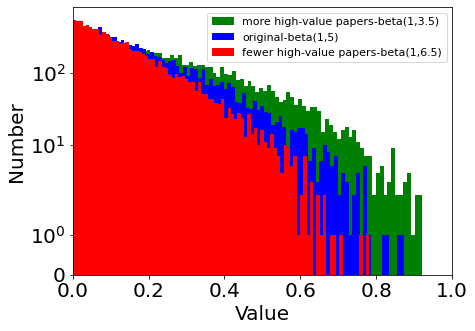

In [ ]:
import numpy as np
np.random.seed(100000)
import matplotlib.pyplot as plt  
num=10000
#ICLR 2022: https://github.com/fedebotu/ICLR2022-OpenReviewData
#ICLR 2021: https://github.com/evanzd/ICLR2021-OpenReviewData
#ICLR 2020: https://github.com/shaohua0116/ICLR2020-OpenReviewData
#ICLR 2019: https://github.com/shaohua0116/ICLR2019-OpenReviewData
#mu, sigma = 0.5, 0.15# for high peak
#mu, sigma = 0.5, 0.2# for low peak
#mu, sigma = 0.8, 0.2# for right skewed
#mu, sigma = 0.2, 0.2# for left skewed
#lower, upper = 0, 1
#X1 = stats.truncnorm(
#  (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
#normative=list(X1.rvs(num))
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True
normative=np.random.beta(1, 5, size=num)
normative2=np.random.beta(1, 3.5, size=num)
normative3=np.random.beta(1, 6.5, size=num)
plt.rcParams.update({'font.size': 20})
n, bins, patches = plt.hist(normative2, 90, facecolor='g', alpha=1, histtype="stepfilled", label ='more high-value papers-beta(1,3.5)')
n, bins, patches = plt.hist(normative, 90, facecolor='b', alpha=1, histtype="stepfilled",  label ='original-beta(1,5)')
n, bins, patches = plt.hist(normative3, 90, facecolor='r', alpha=1, histtype="stepfilled", label ='fewer high-value papers-beta(1,6.5)')
plt.xlabel('Value')
plt.ylabel('Number')
plt.xlim(0,1)
plt.grid(False)
plt.yscale('symlog')
plt.legend(loc='upper right', prop={'size': 11})
plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


<Figure size 540x1080 with 0 Axes>

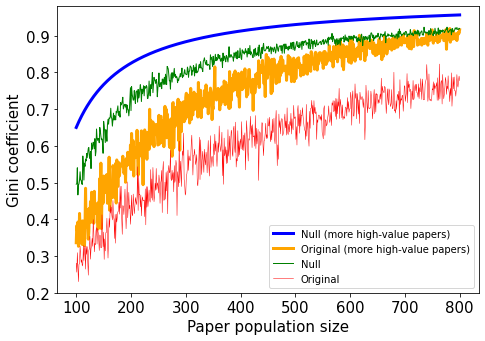

<Figure size 540x1080 with 0 Axes>

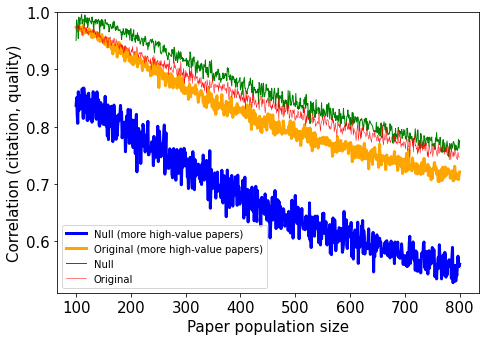

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import seaborn as sns
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})
import numpy
data =pd.read_csv('ginicorr-3.5.csv',error_bad_lines=False, engine="python")
x= numpy.arange(100, 801, 1)
a=data['Null - Gini']
c=data['Original - Gini']
a1=data['ONull - Gini']
c1=data['OOriginal - Gini']
plt.plot(x, a, label='Null (more high-value papers)', linewidth =3, color='b')
plt.plot(x, c, label='Original (more high-value papers)', linewidth =3,  color='orange')
plt.plot(x, a1, label='Null', linewidth =1, color='g')
plt.plot(x, c1, label='Original', linewidth =.5,color='r')
plt.xlabel('Paper population size')
plt.ylabel('Gini coefficient')
plt.legend(loc='lower right', prop={'size': 10})
plt.ylim(0.2,0.98)
plt.show()

test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})
b= data['Null - Corr']
d= data['Original - Corr']
b1= data['ONull - Corr']
d1= data['OOriginal - Corr']
plt.xlabel('Paper population size')
plt.ylabel('Correlation (citation, quality)')
plt.plot(x, b, label='Null (more high-value papers)', linewidth =3, color='b')
plt.plot(x, d, label='Original (more high-value papers)', linewidth =3,  color='orange')
plt.plot(x, b1, label='Null', linewidth =1, color='g')
plt.plot(x, d1, label='Original', linewidth =.5,color='r')
plt.legend(loc='lower left', prop={'size': 10})
plt.ylim(0.51,1)
plt.show()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


<Figure size 540x1080 with 0 Axes>

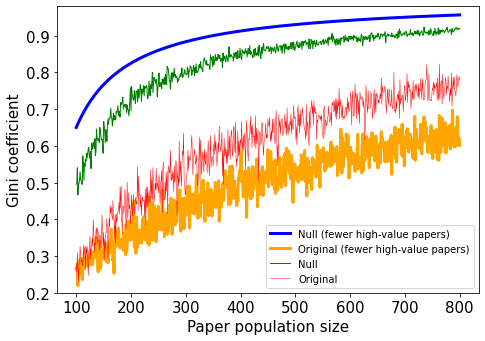

<Figure size 540x1080 with 0 Axes>

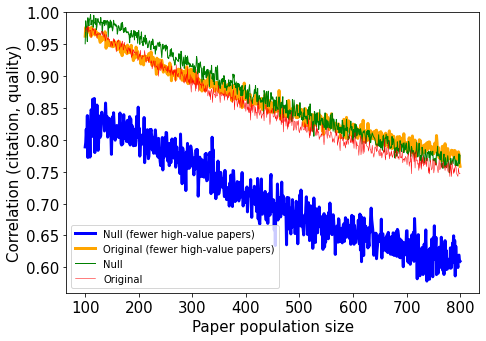

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import seaborn as sns
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})
import numpy
data =pd.read_csv('ginicorr-6.5.csv',error_bad_lines=False, engine="python")
x= numpy.arange(100, 801, 1)
a=data['Null - Gini']
c=data['Original - Gini']
a1=data['ONull - Gini']
c1=data['OOriginal - Gini']
plt.plot(x, a, label='Null (fewer high-value papers)', linewidth =3, color='b')
plt.plot(x, c, label='Original (fewer high-value papers)', linewidth =3,  color='orange')
plt.plot(x, a1, label='Null', linewidth =1, color='g')
plt.plot(x, c1, label='Original', linewidth =.5,color='r')
plt.xlabel('Paper population size')
plt.ylabel('Gini coefficient')
plt.legend(loc='lower right', prop={'size': 10})
plt.ylim(0.2,0.98)
plt.show()

test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})
b= data['Null - Corr']
d= data['Original - Corr']
b1= data['ONull - Corr']
d1= data['OOriginal - Corr']
plt.xlabel('Paper population size')
plt.ylabel('Correlation (citation, quality)')
plt.plot(x, b, label='Null (fewer high-value papers)', linewidth =3, color='b')
plt.plot(x, d, label='Original (fewer high-value papers)', linewidth =3,  color='orange')
plt.plot(x, b1, label='Null', linewidth =1, color='g')
plt.plot(x, d1, label='Original', linewidth =.5,color='r')
plt.legend(loc='lower left', prop={'size': 10})
plt.ylim(0.56,1)
plt.show()


#Robustness Check

1. Noise (higher or lower peak) + fit (higher or lower)
2. Reinforcing strength (\alpha and \beta, higher or lower)




#weght on citation: 0.002, weight of signal on rhetoric: 0.6



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


<Figure size 540x1080 with 0 Axes>

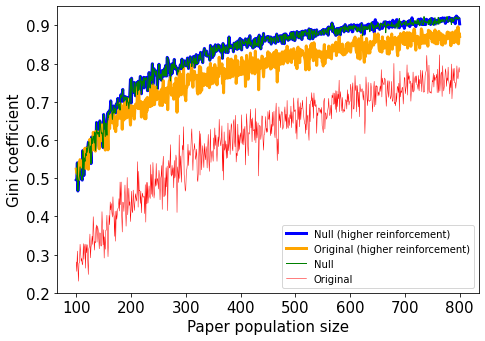

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


<Figure size 540x1080 with 0 Axes>

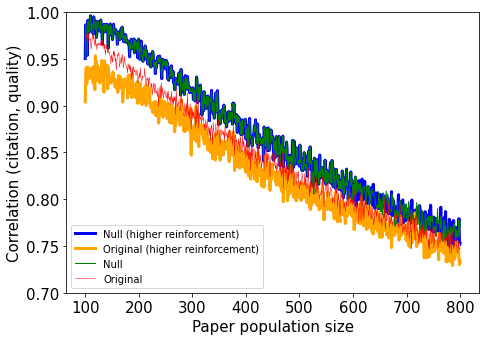

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import seaborn as sns
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})
import numpy
data =pd.read_csv('ginicorr_large_re.csv',error_bad_lines=False, engine="python")
x= numpy.arange(100, 801, 1)
a=data['Null - Gini']
c=data['Original - Gini']
a1=data['ONull - Gini']
c1=data['OOriginal - Gini']
plt.plot(x, a, label='Null (higher reinforcement)', linewidth =3, color='b')
plt.plot(x, c, label='Original (higher reinforcement)', linewidth =3,  color='orange')
plt.plot(x, a1, label='Null', linewidth =1, color='g')
plt.plot(x, c1, label='Original', linewidth =.5,color='r')
plt.xlabel('Paper population size')
plt.ylabel('Gini coefficient')
plt.legend(loc='lower right', prop={'size': 10})
plt.ylim(0.2,0.95)
plt.show()

test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})
b= data['Null - Corr']
d= data['Original - Corr']
b1= data['ONull - Corr']
d1= data['OOriginal - Corr']
plt.xlabel('Paper population size')
plt.ylabel('Correlation (citation, quality)')
plt.plot(x, b, label='Null (higher reinforcement)', linewidth =3, color='b')
plt.plot(x, d, label='Original (higher reinforcement)', linewidth =3,  color='orange')
plt.plot(x, b1, label='Null', linewidth =1, color='g')
plt.plot(x, d1, label='Original', linewidth =.5,color='r')
plt.legend(loc='lower left', prop={'size': 10})
plt.ylim(0.7,1)
plt.show()


<Figure size 540x1080 with 0 Axes>

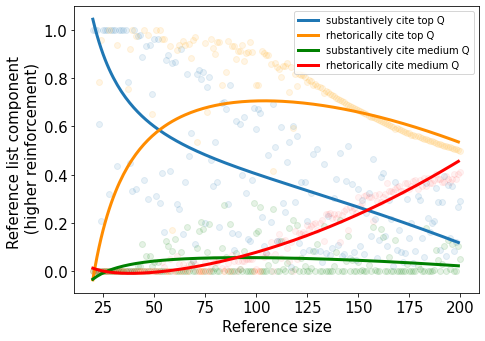

In [ ]:
import matplotlib.pyplot as plt  
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})
import numpy
from scipy.optimize import curve_fit
from numpy import arange

q=[1.0, 1.0, 1.0, 0.6086956521739131, 0.20833333333333334, 1.0, 1.0, 1.0, 0.32142857142857145, 1.0, 1.0, 1.0, 0.4375, 1.0, 1.0, 1.0, 1.0, 0.7837837837837838, 0.4473684210526316, 0.3333333333333333, 1.0, 0.34146341463414637, 0.9761904761904762, 0.9767441860465116, 0.8863636363636364, 0.37777777777777777, 0.9347826086956522, 0.2978723404255319, 0.9375, 0.7346938775510204, 0.96, 0.3137254901960784, 0.9615384615384616, 0.2830188679245283, 0.4074074074074074, 0.16363636363636364, 0.875, 0.8947368421052632, 0.41379310344827586, 0.864406779661017, 0.8666666666666667, 0.2786885245901639, 0.25806451612903225, 0.9206349206349206, 0.15625, 0.36923076923076925, 0.8181818181818182, 0.47761194029850745, 0.5735294117647058, 0.043478260869565216, 0.11428571428571428, 0.8169014084507042, 0.8333333333333334, 0.7945205479452054, 0.8243243243243243, 0.2, 0.7631578947368421, 0.8051948051948052, 0.46153846153846156, 0.35443037974683544, 0.5375, 0.37037037037037035, 0.18292682926829268, 0.6987951807228916, 0.7023809523809523, 0.6705882352941176, 0.27906976744186046, 0.7701149425287356, 0.1590909090909091, 0.0898876404494382, 0.6222222222222222, 0.15384615384615385, 0.6086956521739131, 0.3978494623655914, 0.6382978723404256, 0.3263157894736842, 0.13541666666666666, 0.12371134020618557, 0.37755102040816324, 0.6767676767676768, 0.59, 0.6732673267326733, 0.6568627450980392, 0.22330097087378642, 0.10576923076923077, 0.0761904761904762, 0.4811320754716981, 0.205607476635514, 0.6944444444444444, 0.5137614678899083, 0.12727272727272726, 0.12612612612612611, 0.5982142857142857, 0.2831858407079646, 0.24561403508771928, 0.45217391304347826, 0.5344827586206896, 0.017094017094017096, 0.6016949152542372, 0.2857142857142857, 0.5583333333333333, 0.11570247933884298, 0.36885245901639346, 0.08130081300813008, 0.3709677419354839, 0.208, 0.0873015873015873, 0.3228346456692913, 0.484375, 0.08527131782945736, 0.5076923076923077, 0.08396946564885496, 0.03787878787878788, 0.44360902255639095, 0.07462686567164178, 0.22962962962962963, 0.0661764705882353, 0.0948905109489051, 0.30434782608695654, 0.381294964028777, 0.10714285714285714, 0.48936170212765956, 0.06338028169014084, 0.06993006993006994, 0.375, 0.5172413793103449, 0.0547945205479452, 0.36054421768707484, 0.08108108108108109, 0.04697986577181208, 0.34, 0.10596026490066225, 0.29605263157894735, 0.0718954248366013, 0.24025974025974026, 0.3225806451612903, 0.14743589743589744, 0.46496815286624205, 0.21518987341772153, 0.05660377358490566, 0.13125, 0.391304347826087, 0.4074074074074074, 0.147239263803681, 0.10365853658536585, 0.296969696969697, 0.21686746987951808, 0.023952095808383235, 0.36904761904761907, 0.08875739644970414, 0.17058823529411765, 0.08187134502923976, 0.040697674418604654, 0.07514450867052024, 0.2988505747126437, 0.13714285714285715, 0.19886363636363635, 0.03389830508474576, 0.08426966292134831, 0.3128491620111732, 0.29444444444444445, 0.13812154696132597, 0.06043956043956044, 0.366120218579235, 0.22282608695652173, 0.16216216216216217, 0.1989247311827957, 0.20855614973262032, 0.34574468085106386, 0.2857142857142857, 0.08947368421052632, 0.2879581151832461, 0.3958333333333333, 0.06217616580310881, 0.3556701030927835, 0.13846153846153847, 0.3520408163265306, 0.08629441624365482, 0.12121212121212122, 0.2663316582914573, 0.29]
s=[0.0, 0.0, 0.0, 0.782608695652174, 0.9583333333333334, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.9375, 0.0, 0.0, 0.0, 0.0, 0.7567567567567568, 0.9210526315789473, 1.0, 0.0, 0.975609756097561, 0.0, 0.0, 0.0, 1.0, 0.0, 0.9787234042553191, 0.0, 0.6530612244897959, 0.0, 1.0, 0.0, 1.0, 0.9629629629629629, 0.9636363636363636, 0.0, 0.0, 0.9310344827586207, 0.1694915254237288, 0.0, 0.9180327868852459, 0.9354838709677419, 0.0, 0.953125, 0.9384615384615385, 0.0, 0.9402985074626866, 0.8823529411764706, 0.9565217391304348, 0.9714285714285714, 0.5352112676056338, 0.0, 0.0, 0.0, 0.9466666666666667, 0.6578947368421053, 0.0, 0.9615384615384616, 0.9240506329113924, 0.9, 0.9506172839506173, 0.9512195121951219, 0.7710843373493976, 0.0, 0.8235294117647058, 0.9534883720930233, 0.0, 0.9318181818181818, 0.9325842696629213, 0.8777777777777778, 0.9120879120879121, 0.9130434782608695, 0.9354838709677419, 0.8723404255319149, 0.9052631578947369, 0.90625, 0.9484536082474226, 0.9081632653061225, 0.0, 0.77, 0.7722772277227723, 0.0, 0.912621359223301, 0.9038461538461539, 0.8952380952380953, 0.8962264150943396, 0.8598130841121495, 0.4166666666666667, 0.8623853211009175, 0.8454545454545455, 0.8378378378378378, 0.8035714285714286, 0.8495575221238938, 0.8508771929824561, 0.8608695652173913, 0.7413793103448276, 0.8461538461538461, 0.5932203389830508, 0.8151260504201681, 0.7666666666666667, 0.8181818181818182, 0.8114754098360656, 0.8130081300813008, 0.8064516129032258, 0.784, 0.7936507936507936, 0.7874015748031497, 0.7734375, 0.7751937984496124, 0.7692307692307693, 0.7633587786259542, 0.7575757575757576, 0.7368421052631579, 0.746268656716418, 0.7407407407407407, 0.7352941176470589, 0.7299270072992701, 0.7246376811594203, 0.7194244604316546, 0.7142857142857143, 0.7092198581560284, 0.704225352112676, 0.6993006993006993, 0.6944444444444444, 0.6896551724137931, 0.684931506849315, 0.6802721088435374, 0.6756756756756757, 0.6711409395973155, 0.6666666666666666, 0.6622516556291391, 0.6578947368421053, 0.6535947712418301, 0.6493506493506493, 0.6451612903225806, 0.6410256410256411, 0.6369426751592356, 0.6329113924050633, 0.6289308176100629, 0.625, 0.6211180124223602, 0.6172839506172839, 0.6134969325153374, 0.6097560975609756, 0.6060606060606061, 0.6024096385542169, 0.5988023952095808, 0.5892857142857143, 0.591715976331361, 0.5882352941176471, 0.5847953216374269, 0.5813953488372093, 0.5780346820809249, 0.5747126436781609, 0.5714285714285714, 0.5625, 0.5649717514124294, 0.5617977528089888, 0.5586592178770949, 0.5555555555555556, 0.5524861878453039, 0.5494505494505495, 0.546448087431694, 0.5434782608695652, 0.5405405405405406, 0.5376344086021505, 0.5347593582887701, 0.5319148936170213, 0.5291005291005291, 0.5263157894736842, 0.5235602094240838, 0.5208333333333334, 0.5181347150259067, 0.5154639175257731, 0.5128205128205128, 0.5102040816326531, 0.5076142131979695, 0.5050505050505051, 0.5025125628140703, 0.5]
r=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.023809523809523808, 0.023255813953488372, 0.11363636363636363, 0.0, 0.06521739130434782, 0.0, 0.0625, 0.02040816326530612, 0.04, 0.0, 0.038461538461538464, 0.0, 0.0, 0.0, 0.125, 0.10526315789473684, 0.0, 0.0847457627118644, 0.13333333333333333, 0.0, 0.0, 0.07936507936507936, 0.0, 0.0, 0.18181818181818182, 0.0, 0.029411764705882353, 0.0, 0.0, 0.09859154929577464, 0.16666666666666666, 0.2054794520547945, 0.17567567567567569, 0.0, 0.07894736842105263, 0.19480519480519481, 0.0, 0.0, 0.0125, 0.0, 0.0, 0.0963855421686747, 0.27380952380952384, 0.058823529411764705, 0.0, 0.19540229885057472, 0.0, 0.0, 0.07777777777777778, 0.0, 0.010869565217391304, 0.0, 0.0851063829787234, 0.0, 0.0, 0.0, 0.0, 0.2828282828282828, 0.16, 0.16831683168316833, 0.2647058823529412, 0.0, 0.0, 0.0, 0.02830188679245283, 0.0, 0.25925925925925924, 0.045871559633027525, 0.0, 0.0, 0.125, 0.008849557522123894, 0.0, 0.034782608695652174, 0.1810344827586207, 0.0, 0.211864406779661, 0.008403361344537815, 0.19166666666666668, 0.0, 0.05737704918032787, 0.0, 0.024193548387096774, 0.0, 0.0, 0.015748031496062992, 0.0859375, 0.0, 0.11538461538461539, 0.0, 0.0, 0.18796992481203006, 0.0, 0.0, 0.0, 0.0, 0.021739130434782608, 0.07913669064748201, 0.0, 0.2127659574468085, 0.0, 0.0, 0.041666666666666664, 0.14482758620689656, 0.0, 0.047619047619047616, 0.0, 0.0, 0.04, 0.0, 0.006578947368421052, 0.0, 0.0, 0.025806451612903226, 0.0, 0.18471337579617833, 0.006329113924050633, 0.0, 0.0, 0.17391304347826086, 0.1419753086419753, 0.0, 0.0, 0.06060606060606061, 0.0, 0.0, 0.13095238095238096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.028735632183908046, 0.0, 0.0, 0.0, 0.0, 0.0223463687150838, 0.011111111111111112, 0.0, 0.0, 0.18032786885245902, 0.0, 0.0, 0.0, 0.0053475935828877, 0.09042553191489362, 0.047619047619047616, 0.0, 0.031413612565445025, 0.10416666666666667, 0.0, 0.12886597938144329, 0.010256410256410256, 0.11224489795918367, 0.0, 0.0, 0.10552763819095477, 0.05]
z=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.037037037037037035, 0.01818181818181818, 0.0, 0.0, 0.05172413793103448, 0.0, 0.0, 0.06557377049180328, 0.03225806451612903, 0.0, 0.03125, 0.015384615384615385, 0.0, 0.029850746268656716, 0.014705882352941176, 0.043478260869565216, 0.02857142857142857, 0.0, 0.0, 0.0, 0.0, 0.04, 0.0, 0.0, 0.01282051282051282, 0.05063291139240506, 0.0375, 0.037037037037037035, 0.04878048780487805, 0.012048192771084338, 0.0, 0.011764705882352941, 0.03488372093023256, 0.0, 0.06818181818181818, 0.0449438202247191, 0.0, 0.04395604395604396, 0.010869565217391304, 0.043010752688172046, 0.0425531914893617, 0.05263157894736842, 0.052083333333333336, 0.05154639175257732, 0.05102040816326531, 0.0, 0.01, 0.0, 0.0, 0.07766990291262135, 0.057692307692307696, 0.0761904761904762, 0.0660377358490566, 0.12149532710280374, 0.0, 0.07339449541284404, 0.12727272727272726, 0.15315315315315314, 0.05357142857142857, 0.12389380530973451, 0.13157894736842105, 0.09565217391304348, 0.04310344827586207, 0.11965811965811966, 0.0, 0.16806722689075632, 0.05, 0.15702479338842976, 0.1557377049180328, 0.16260162601626016, 0.1532258064516129, 0.192, 0.1746031746031746, 0.1889763779527559, 0.1953125, 0.20155038759689922, 0.16923076923076924, 0.1984732824427481, 0.21212121212121213, 0.12781954887218044, 0.23880597014925373, 0.23703703703703705, 0.2426470588235294, 0.21897810218978103, 0.2391304347826087, 0.22302158273381295, 0.2357142857142857, 0.12056737588652482, 0.2323943661971831, 0.2517482517482518, 0.2569444444444444, 0.1724137931034483, 0.2671232876712329, 0.25170068027210885, 0.2635135135135135, 0.24161073825503357, 0.30666666666666664, 0.271523178807947, 0.28289473684210525, 0.3137254901960784, 0.3181818181818182, 0.3096774193548387, 0.3076923076923077, 0.21019108280254778, 0.31645569620253167, 0.2893081761006289, 0.31875, 0.2857142857142857, 0.30864197530864196, 0.31901840490797545, 0.36585365853658536, 0.3333333333333333, 0.3313253012048193, 0.32934131736526945, 0.3392857142857143, 0.34911242603550297, 0.35294117647058826, 0.3333333333333333, 0.3313953488372093, 0.36416184971098264, 0.367816091954023, 0.34285714285714286, 0.3522727272727273, 0.3728813559322034, 0.37640449438202245, 0.3407821229050279, 0.37777777777777777, 0.35359116022099446, 0.38461538461538464, 0.3551912568306011, 0.3858695652173913, 0.3675675675675676, 0.3655913978494624, 0.37967914438502676, 0.40425531914893614, 0.38095238095238093, 0.38421052631578945, 0.3717277486910995, 0.3697916666666667, 0.39378238341968913, 0.38144329896907214, 0.36923076923076925, 0.3826530612244898, 0.4010152284263959, 0.3838383838383838, 0.4020100502512563, 0.41]

x= numpy.arange(20, 201, 1)

# define the true objective function
def objective(x, a, b, c):
	return a * x*x+ (1/x)* b + c

popt1, _ = curve_fit(objective, x, q)
popt2, _ = curve_fit(objective, x, s)
popt3, _ = curve_fit(objective, x, r)
popt4, _ = curve_fit(objective, x, z)
# summarize the parameter values
a, b, c = popt1
d, e, f =popt2
g, h, i =popt3
j, k, l =popt4
# plot input vs output
plt.scatter(x, q, marker='o',norm =0, color='#1f77b4', alpha =0.1)
plt.scatter(x, s, marker='o',norm =0, color='orange', alpha =0.1)
plt.scatter(x, r, marker='o',norm =0, color='green', alpha =0.1)
plt.scatter(x, z, marker='o',norm =0, color='red', alpha =0.05)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line1 = objective(x_line, a, b, c)
y_line2  = objective(x_line, d, e, f)
y_line3  = objective(x_line, g, h, i)
y_line4  = objective(x_line, j, k, l)
# create a line plot for the mapping function
plt.plot(x_line, y_line1, '-', color='#1f77b4', label='substantively cite top Q', linewidth=3)
plt.plot(x_line, y_line2, '-', color='darkorange', label='rhetorically cite top Q',linewidth=3)
plt.plot(x_line, y_line3, '-', color='green', label='substantively cite medium Q',linewidth=3)
plt.plot(x_line, y_line4, '-', color='red',label='rhetorically cite medium Q', linewidth=3)
plt.xlabel('Reference size')
plt.ylabel('Reference list component \n (higher reinforcement)')
plt.legend(loc='upper right', prop={'size': 10})
plt.show()

#weght on citation: 0.0005, weight of signal on rhetoric: 0.15



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


<Figure size 540x1080 with 0 Axes>

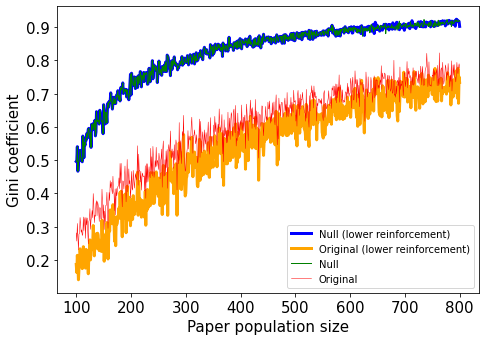

<Figure size 540x1080 with 0 Axes>

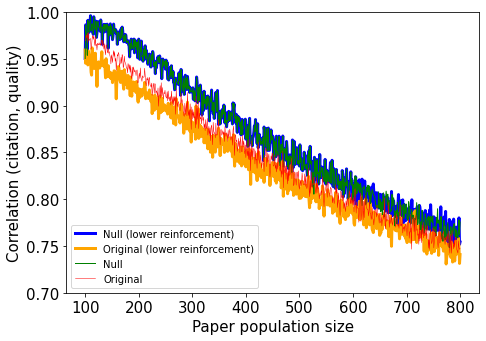

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import seaborn as sns
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})
import numpy
data =pd.read_csv('ginicorr_small_re.csv',error_bad_lines=False, engine="python")
x= numpy.arange(100, 801, 1)
a=data['Null - Gini']
c=data['Original - Gini']
a1=data['ONull - Gini']
c1=data['OOriginal - Gini']
plt.plot(x, a, label='Null (lower reinforcement)', linewidth =3, color='b')
plt.plot(x, c, label='Original (lower reinforcement)', linewidth =3,  color='orange')
plt.plot(x, a1, label='Null', linewidth =1, color='g')
plt.plot(x, c1, label='Original', linewidth =.5,color='r')
plt.xlabel('Paper population size')
plt.ylabel('Gini coefficient')
plt.legend(loc='lower right', prop={'size': 10})
plt.show()

test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})
b= data['Null - Corr']
d= data['Original - Corr']
b1= data['ONull - Corr']
d1= data['OOriginal - Corr']
plt.xlabel('Paper population size')
plt.ylabel('Correlation (citation, quality)')
plt.plot(x, b, label='Null (lower reinforcement)', linewidth =3, color='b')
plt.plot(x, d, label='Original (lower reinforcement)', linewidth =3,  color='orange')
plt.plot(x, b1, label='Null', linewidth =1, color='g')
plt.plot(x, d1, label='Original', linewidth =.5,color='r')
plt.legend(loc='lower left', prop={'size': 10})
plt.ylim(0.7,1)
plt.show()


<Figure size 540x1080 with 0 Axes>

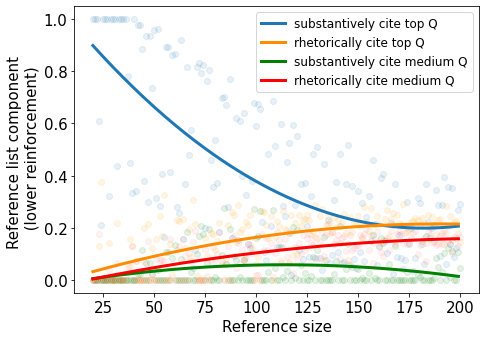

In [ ]:
import matplotlib.pyplot as plt  
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})
import numpy
from scipy.optimize import curve_fit
from numpy import arange

q=[1.0, 1.0, 1.0, 0.6086956521739131, 0.20833333333333334, 1.0, 1.0, 1.0, 0.32142857142857145, 1.0, 1.0, 1.0, 0.4375, 1.0, 1.0, 1.0, 1.0, 0.7837837837837838, 0.4473684210526316, 0.3333333333333333, 1.0, 0.34146341463414637, 0.9761904761904762, 0.9767441860465116, 0.8863636363636364, 0.37777777777777777, 0.9347826086956522, 0.2978723404255319, 0.9375, 0.7346938775510204, 0.96, 0.3137254901960784, 0.9615384615384616, 0.2830188679245283, 0.4074074074074074, 0.16363636363636364, 0.8928571428571429, 0.8947368421052632, 0.41379310344827586, 0.864406779661017, 0.8666666666666667, 0.2786885245901639, 0.25806451612903225, 0.9206349206349206, 0.15625, 0.36923076923076925, 0.8181818181818182, 0.47761194029850745, 0.5735294117647058, 0.043478260869565216, 0.11428571428571428, 0.8169014084507042, 0.8333333333333334, 0.7945205479452054, 0.8243243243243243, 0.2, 0.7631578947368421, 0.8051948051948052, 0.46153846153846156, 0.35443037974683544, 0.5375, 0.37037037037037035, 0.18292682926829268, 0.6987951807228916, 0.7023809523809523, 0.6705882352941176, 0.27906976744186046, 0.7701149425287356, 0.1590909090909091, 0.0898876404494382, 0.6222222222222222, 0.15384615384615385, 0.6086956521739131, 0.3978494623655914, 0.6382978723404256, 0.3263157894736842, 0.13541666666666666, 0.12371134020618557, 0.37755102040816324, 0.6767676767676768, 0.59, 0.6732673267326733, 0.6568627450980392, 0.22330097087378642, 0.10576923076923077, 0.0761904761904762, 0.4811320754716981, 0.205607476635514, 0.6851851851851852, 0.5137614678899083, 0.12727272727272726, 0.12612612612612611, 0.5982142857142857, 0.2831858407079646, 0.24561403508771928, 0.45217391304347826, 0.5258620689655172, 0.017094017094017096, 0.5932203389830508, 0.2857142857142857, 0.55, 0.11570247933884298, 0.36885245901639346, 0.08130081300813008, 0.3709677419354839, 0.208, 0.0873015873015873, 0.3228346456692913, 0.484375, 0.08527131782945736, 0.5076923076923077, 0.08396946564885496, 0.03787878787878788, 0.44360902255639095, 0.07462686567164178, 0.22962962962962963, 0.0661764705882353, 0.0948905109489051, 0.30434782608695654, 0.37410071942446044, 0.10714285714285714, 0.48226950354609927, 0.06338028169014084, 0.06993006993006994, 0.3680555555555556, 0.5172413793103449, 0.0547945205479452, 0.36054421768707484, 0.08108108108108109, 0.04697986577181208, 0.34, 0.10596026490066225, 0.29605263157894735, 0.0718954248366013, 0.24025974025974026, 0.3225806451612903, 0.14743589743589744, 0.4585987261146497, 0.21518987341772153, 0.05660377358490566, 0.13125, 0.391304347826087, 0.4074074074074074, 0.147239263803681, 0.10365853658536585, 0.296969696969697, 0.21686746987951808, 0.023952095808383235, 0.36904761904761907, 0.08875739644970414, 0.17058823529411765, 0.08187134502923976, 0.040697674418604654, 0.07514450867052024, 0.2988505747126437, 0.13714285714285715, 0.19886363636363635, 0.03389830508474576, 0.08426966292134831, 0.3128491620111732, 0.29444444444444445, 0.13812154696132597, 0.06043956043956044, 0.366120218579235, 0.22282608695652173, 0.16216216216216217, 0.1989247311827957, 0.20855614973262032, 0.34574468085106386, 0.2857142857142857, 0.08947368421052632, 0.2879581151832461, 0.3958333333333333, 0.06217616580310881, 0.3556701030927835, 0.13846153846153847, 0.3520408163265306, 0.08629441624365482, 0.12121212121212122, 0.2663316582914573, 0.29]
s=[0.0, 0.0, 0.0, 0.13043478260869565, 0.375, 0.0, 0.0, 0.0, 0.14285714285714285, 0.0, 0.0, 0.0, 0.21875, 0.0, 0.0, 0.0, 0.0, 0.05405405405405406, 0.15789473684210525, 0.1282051282051282, 0.0, 0.07317073170731707, 0.0, 0.0, 0.0, 0.2, 0.0, 0.2127659574468085, 0.0, 0.12244897959183673, 0.0, 0.1568627450980392, 0.0, 0.24528301886792453, 0.16666666666666666, 0.32727272727272727, 0.0, 0.0, 0.13793103448275862, 0.01694915254237288, 0.0, 0.22950819672131148, 0.22580645161290322, 0.0, 0.234375, 0.12307692307692308, 0.0, 0.19402985074626866, 0.08823529411764706, 0.30434782608695654, 0.21428571428571427, 0.014084507042253521, 0.0, 0.0, 0.0, 0.16, 0.09210526315789473, 0.0, 0.1794871794871795, 0.17721518987341772, 0.1125, 0.14814814814814814, 0.21951219512195122, 0.07228915662650602, 0.0, 0.08235294117647059, 0.20930232558139536, 0.0, 0.26136363636363635, 0.24719101123595505, 0.14444444444444443, 0.2857142857142857, 0.18478260869565216, 0.1935483870967742, 0.0851063829787234, 0.22105263157894736, 0.20833333333333334, 0.24742268041237114, 0.12244897959183673, 0.0, 0.06, 0.0891089108910891, 0.0, 0.2621359223300971, 0.25961538461538464, 0.20952380952380953, 0.16037735849056603, 0.24299065420560748, 0.0, 0.1651376146788991, 0.22727272727272727, 0.2072072072072072, 0.07142857142857142, 0.26548672566371684, 0.19298245614035087, 0.19130434782608696, 0.06896551724137931, 0.24786324786324787, 0.09322033898305085, 0.2184873949579832, 0.1, 0.24793388429752067, 0.20491803278688525, 0.22764227642276422, 0.23387096774193547, 0.248, 0.23015873015873015, 0.1732283464566929, 0.1875, 0.2868217054263566, 0.16153846153846155, 0.24427480916030533, 0.2727272727272727, 0.07518796992481203, 0.208955223880597, 0.24444444444444444, 0.22058823529411764, 0.18248175182481752, 0.2391304347826087, 0.2014388489208633, 0.22857142857142856, 0.14184397163120568, 0.21830985915492956, 0.2517482517482518, 0.18055555555555555, 0.07586206896551724, 0.23972602739726026, 0.1836734693877551, 0.21621621621621623, 0.21476510067114093, 0.24666666666666667, 0.2052980132450331, 0.15789473684210525, 0.28104575163398693, 0.22077922077922077, 0.1870967741935484, 0.27564102564102566, 0.14012738853503184, 0.21518987341772153, 0.24528301886792453, 0.2125, 0.14285714285714285, 0.15432098765432098, 0.2331288343558282, 0.2682926829268293, 0.1696969696969697, 0.23493975903614459, 0.25748502994011974, 0.1488095238095238, 0.2485207100591716, 0.21764705882352942, 0.21052631578947367, 0.29069767441860467, 0.2023121387283237, 0.1839080459770115, 0.19428571428571428, 0.2215909090909091, 0.22598870056497175, 0.23595505617977527, 0.22905027932960895, 0.2111111111111111, 0.23756906077348067, 0.21978021978021978, 0.14207650273224043, 0.25, 0.2, 0.24193548387096775, 0.21390374331550802, 0.17553191489361702, 0.2275132275132275, 0.23157894736842105, 0.13612565445026178, 0.1875, 0.2849740932642487, 0.20618556701030927, 0.24615384615384617, 0.15306122448979592, 0.2233502538071066, 0.22727272727272727, 0.18090452261306533, 0.145]
r=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.023809523809523808, 0.023255813953488372, 0.11363636363636363, 0.0, 0.06521739130434782, 0.0, 0.0625, 0.02040816326530612, 0.04, 0.0, 0.038461538461538464, 0.0, 0.0, 0.0, 0.10714285714285714, 0.10526315789473684, 0.0, 0.0847457627118644, 0.13333333333333333, 0.0, 0.0, 0.07936507936507936, 0.0, 0.0, 0.18181818181818182, 0.0, 0.029411764705882353, 0.0, 0.0, 0.09859154929577464, 0.16666666666666666, 0.2054794520547945, 0.17567567567567569, 0.0, 0.06578947368421052, 0.19480519480519481, 0.0, 0.0, 0.0125, 0.0, 0.0, 0.0963855421686747, 0.27380952380952384, 0.058823529411764705, 0.0, 0.19540229885057472, 0.0, 0.0, 0.07777777777777778, 0.0, 0.010869565217391304, 0.0, 0.07446808510638298, 0.0, 0.0, 0.0, 0.0, 0.2727272727272727, 0.16, 0.16831683168316833, 0.2647058823529412, 0.0, 0.0, 0.0, 0.02830188679245283, 0.0, 0.26851851851851855, 0.045871559633027525, 0.0, 0.0, 0.125, 0.008849557522123894, 0.0, 0.034782608695652174, 0.1810344827586207, 0.0, 0.2033898305084746, 0.008403361344537815, 0.19166666666666668, 0.0, 0.05737704918032787, 0.0, 0.024193548387096774, 0.0, 0.0, 0.015748031496062992, 0.0859375, 0.0, 0.11538461538461539, 0.0, 0.0, 0.16541353383458646, 0.0, 0.0, 0.0, 0.0, 0.021739130434782608, 0.07194244604316546, 0.0, 0.20567375886524822, 0.0, 0.0, 0.041666666666666664, 0.13793103448275862, 0.0, 0.047619047619047616, 0.0, 0.0, 0.04, 0.0, 0.006578947368421052, 0.0, 0.0, 0.025806451612903226, 0.0, 0.17197452229299362, 0.006329113924050633, 0.0, 0.0, 0.16149068322981366, 0.1419753086419753, 0.0, 0.0, 0.06060606060606061, 0.0, 0.0, 0.13095238095238096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.028735632183908046, 0.0, 0.0, 0.0, 0.0, 0.01675977653631285, 0.011111111111111112, 0.0, 0.0, 0.16939890710382513, 0.0, 0.0, 0.0, 0.0053475935828877, 0.0851063829787234, 0.047619047619047616, 0.0, 0.031413612565445025, 0.10416666666666667, 0.0, 0.12371134020618557, 0.010256410256410256, 0.11224489795918367, 0.0, 0.0, 0.10552763819095477, 0.045]
z=[0.0, 0.0, 0.0, 0.17391304347826086, 0.0, 0.0, 0.0, 0.0, 0.03571428571428571, 0.0, 0.0, 0.0, 0.0625, 0.0, 0.0, 0.0, 0.0, 0.02702702702702703, 0.05263157894736842, 0.1282051282051282, 0.0, 0.07317073170731707, 0.0, 0.0, 0.0, 0.06666666666666667, 0.0, 0.14893617021276595, 0.0, 0.02040816326530612, 0.0, 0.0784313725490196, 0.0, 0.07547169811320754, 0.07407407407407407, 0.07272727272727272, 0.0, 0.0, 0.15517241379310345, 0.05084745762711865, 0.0, 0.11475409836065574, 0.12903225806451613, 0.0, 0.15625, 0.09230769230769231, 0.0, 0.1044776119402985, 0.07352941176470588, 0.14492753623188406, 0.18571428571428572, 0.0, 0.0, 0.0, 0.0, 0.12, 0.013157894736842105, 0.0, 0.07692307692307693, 0.12658227848101267, 0.075, 0.09876543209876543, 0.18292682926829268, 0.060240963855421686, 0.0, 0.058823529411764705, 0.12790697674418605, 0.0, 0.1590909090909091, 0.16853932584269662, 0.044444444444444446, 0.14285714285714285, 0.06521739130434782, 0.11827956989247312, 0.07446808510638298, 0.08421052631578947, 0.13541666666666666, 0.13402061855670103, 0.10204081632653061, 0.0, 0.02, 0.019801980198019802, 0.0, 0.17475728155339806, 0.11538461538461539, 0.1619047619047619, 0.11320754716981132, 0.14018691588785046, 0.009259259259259259, 0.10091743119266056, 0.18181818181818182, 0.15315315315315314, 0.0625, 0.12389380530973451, 0.15789473684210525, 0.08695652173913043, 0.0603448275862069, 0.1794871794871795, 0.025423728813559324, 0.12605042016806722, 0.075, 0.14049586776859505, 0.09836065573770492, 0.17073170731707318, 0.11290322580645161, 0.16, 0.1746031746031746, 0.14173228346456693, 0.1328125, 0.16279069767441862, 0.08461538461538462, 0.1450381679389313, 0.18181818181818182, 0.09022556390977443, 0.17164179104477612, 0.21481481481481482, 0.17647058823529413, 0.18248175182481752, 0.13768115942028986, 0.1510791366906475, 0.17142857142857143, 0.07801418439716312, 0.1619718309859155, 0.16783216783216784, 0.1111111111111111, 0.06206896551724138, 0.17123287671232876, 0.11564625850340136, 0.12162162162162163, 0.1342281879194631, 0.13333333333333333, 0.17218543046357615, 0.16447368421052633, 0.17647058823529413, 0.19480519480519481, 0.11612903225806452, 0.17307692307692307, 0.06369426751592357, 0.15822784810126583, 0.18238993710691823, 0.125, 0.10559006211180125, 0.09259259259259259, 0.15337423312883436, 0.15853658536585366, 0.11515151515151516, 0.18674698795180722, 0.20958083832335328, 0.13690476190476192, 0.17751479289940827, 0.18823529411764706, 0.17543859649122806, 0.13953488372093023, 0.1791907514450867, 0.13793103448275862, 0.14285714285714285, 0.1590909090909091, 0.1807909604519774, 0.1853932584269663, 0.1005586592178771, 0.13333333333333333, 0.14917127071823205, 0.15934065934065933, 0.07103825136612021, 0.18478260869565216, 0.17297297297297298, 0.14516129032258066, 0.1443850267379679, 0.13297872340425532, 0.13756613756613756, 0.16842105263157894, 0.17801047120418848, 0.13541666666666666, 0.18134715025906736, 0.14948453608247422, 0.13846153846153847, 0.10204081632653061, 0.16243654822335024, 0.16161616161616163, 0.1306532663316583, 0.165]

x= numpy.arange(20, 201, 1)

# define the true objective function
def objective(x, a, b, c):
	return a * x **2 + x* b + c

popt1, _ = curve_fit(objective, x, q)
popt2, _ = curve_fit(objective, x, s)
popt3, _ = curve_fit(objective, x, r)
popt4, _ = curve_fit(objective, x, z)
# summarize the parameter values
a, b, c = popt1
d, e, f =popt2
g, h, i =popt3
j, k, l =popt4
# plot input vs output
plt.scatter(x, q, marker='o',norm =0, color='#1f77b4', alpha =0.1)
plt.scatter(x, s, marker='o',norm =0, color='orange', alpha =0.1)
plt.scatter(x, r, marker='o',norm =0, color='green', alpha =0.1)
plt.scatter(x, z, marker='o',norm =0, color='red', alpha =0.05)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line1 = objective(x_line, a, b, c)
y_line2  = objective(x_line, d, e, f)
y_line3  = objective(x_line, g, h, i)
y_line4  = objective(x_line, j, k, l)
# create a line plot for the mapping function
plt.plot(x_line, y_line1, '-', color='#1f77b4', label='substantively cite top Q', linewidth=3)
plt.plot(x_line, y_line2, '-', color='darkorange', label='rhetorically cite top Q',linewidth=3)
plt.plot(x_line, y_line3, '-', color='green', label='substantively cite medium Q',linewidth=3)
plt.plot(x_line, y_line4, '-', color='red',label='rhetorically cite medium Q', linewidth=3)
plt.xlabel('Reference size')
plt.ylabel('Reference list component \n (lower reinforcement)')
plt.legend(loc='upper right', prop={'size': 12})
plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


<Figure size 540x1080 with 0 Axes>

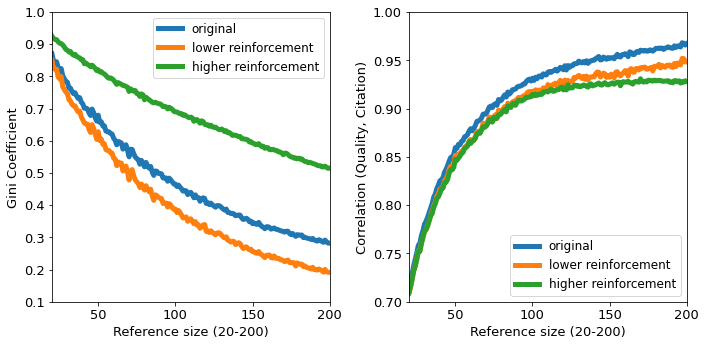

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
test = plt.figure()
fig, ax = plt.subplots(figsize=(10, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 13})
import numpy
data1 =pd.read_csv('compare_smaller_re.csv',error_bad_lines=False, engine="python")
x1= numpy.arange(20, 201, 1)

plt.subplot(1, 2, 1)
b= data1['Ref 20-200 Gini']
b1=data1['L-Gini']
b2=data1['H-Gini']
plt.plot(x1, b,  linewidth =5, label='original')
plt.plot(x1, b1,  linewidth =5, label='lower reinforcement')
plt.plot(x1, b2,  linewidth =5,label='higher reinforcement')
plt.xlabel('Reference size (20-200)')
plt.ylabel('Gini Coefficient')
plt.legend(loc='upper right', prop={'size': 12})
plt.xlim(20,200)
plt.ylim(0.1,1)
#plt.title("The impact of reference size (20-200) on inequality")

plt.subplot(1, 2, 2)
a= data1['Ref 20-200 corr']
a1=data1['L-Corr']
a2=data1['H-Corr']
plt.plot(x1, a,  linewidth =5, label='original')
plt.plot(x1, a1,  linewidth =5, label='lower reinforcement')
plt.plot(x1, a2,  linewidth =5,label='higher reinforcement')
plt.xlabel('Reference size (20-200)')
plt.ylabel('Correlation (Quality, Citation)')
plt.ylim(0.7,1)
plt.xlim(20,200)
plt.legend(loc='lower right', prop={'size': 12})
#plt.title("The impact of reference size (20-200) on corr(Q, C)")
plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


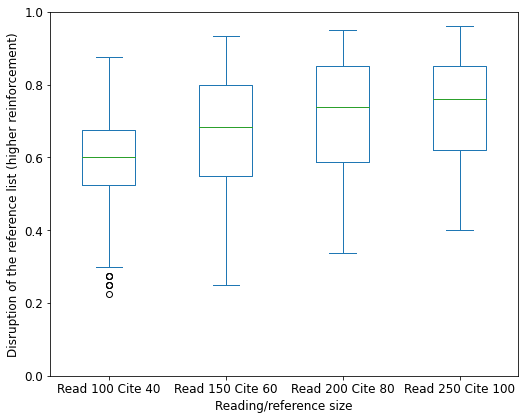

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


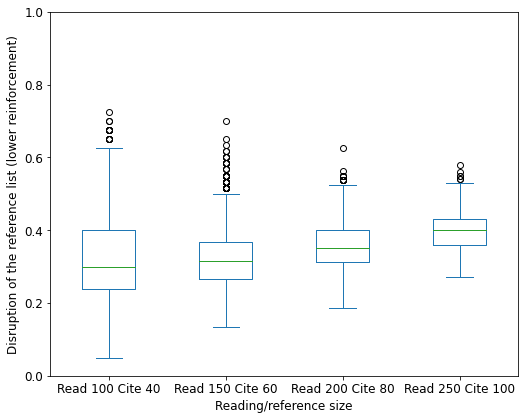

In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd 

plt.rcParams["figure.figsize"] = [7.50, 6]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 12})
data1 =pd.read_csv('dis_hl.csv',error_bad_lines=False, engine="python")
# Creating axes instance
ax = data1[['Read 100 Cite 40','Read 150 Cite 60','Read 200 Cite 80','Read 250 Cite 100']].plot(kind='box')
plt.xlabel('Reading/reference size')
plt.ylabel('Disruption of the reference list (higher reinforcement)')
plt.ylim(0,1)
plt.show()

plt.rcParams["figure.figsize"] = [7.50, 6]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 12})
data2 =pd.read_csv('dis_ll.csv',error_bad_lines=False, engine="python")
# Creating axes instance
ax = data2[['Read 100 Cite 40','Read 150 Cite 60','Read 200 Cite 80','Read 250 Cite 100']].plot(kind='box')
plt.xlabel('Reading/reference size')
plt.ylabel('Disruption of the reference list (lower reinforcement)')
plt.ylim(0,1)
plt.show()

# Noise

<Figure size 540x396 with 0 Axes>

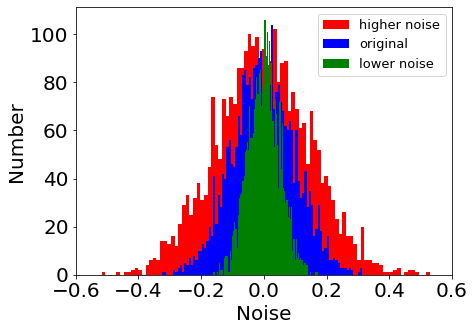

In [ ]:
import numpy as np
np.random.seed(100000)
import matplotlib.pyplot as plt  
num=3000
noise3=0.05
noise1 =0.1
noise2 =0.15
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True
noise_list1=np.random.normal(0, noise1, size=num)
noise_list2=np.random.normal(0, noise2, size=num)
noise_list3=np.random.normal(0, noise3, size=num)
n, bins, patches = plt.hist(noise_list2, 90, facecolor='r', alpha=1, histtype="stepfilled", label='higher noise')
n, bins, patches = plt.hist(noise_list1, 90, facecolor='b', alpha=1, histtype="stepfilled", label ='original')
n, bins, patches = plt.hist(noise_list3, 90, facecolor='g', alpha=1, histtype="stepfilled", label ='lower noise')
plt.xlabel('Noise')
plt.ylabel('Number')
plt.xlim(-.6, .6)
plt.grid(False)
plt.legend(loc='upper right', prop={'size': 13})
plt.show()

# Fit 0.3 Noise 0.15

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


<Figure size 540x1080 with 0 Axes>

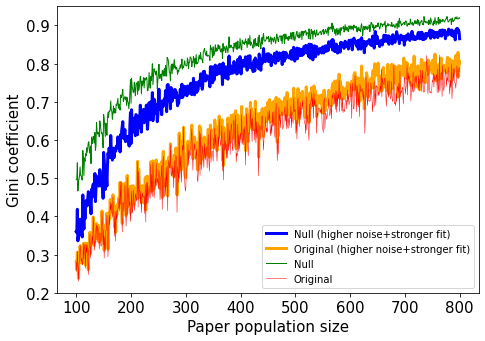

<Figure size 540x1080 with 0 Axes>

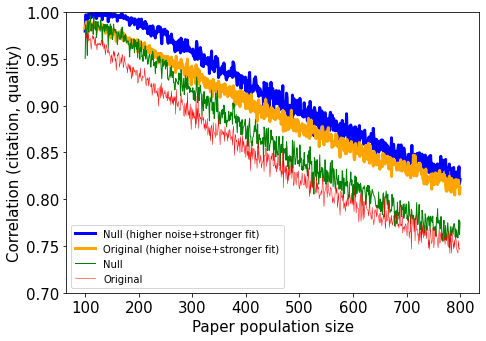

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import seaborn as sns
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})
import numpy
data =pd.read_csv('ginicorr_highn.csv',error_bad_lines=False, engine="python")
x= numpy.arange(100, 801, 1)
a=data['Null - Gini']
c=data['Original - Gini']
a1=data['ONull - Gini']
c1=data['OOriginal - Gini']
plt.plot(x, a, label='Null (higher noise+stronger fit)', linewidth =3, color='b')
plt.plot(x, c, label='Original (higher noise+stronger fit)', linewidth =3,  color='orange')
plt.plot(x, a1, label='Null', linewidth =1, color='g')
plt.plot(x, c1, label='Original', linewidth =.5,color='r')
plt.xlabel('Paper population size')
plt.ylabel('Gini coefficient')
plt.legend(loc='lower right', prop={'size': 10})
plt.ylim(0.2,0.95)
plt.show()

test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})
b= data['Null - Corr']
d= data['Original - Corr']
b1= data['ONull - Corr']
d1= data['OOriginal - Corr']
plt.xlabel('Paper population size')
plt.ylabel('Correlation (citation, quality)')
plt.plot(x, b, label='Null (higher noise+stronger fit)', linewidth =3, color='b')
plt.plot(x, d, label='Original (higher noise+stronger fit)', linewidth =3,  color='orange')
plt.plot(x, b1, label='Null', linewidth =1, color='g')
plt.plot(x, d1, label='Original', linewidth =.5,color='r')
plt.legend(loc='lower left', prop={'size': 10})
plt.ylim(0.7,1)
plt.show()


<Figure size 540x1080 with 0 Axes>

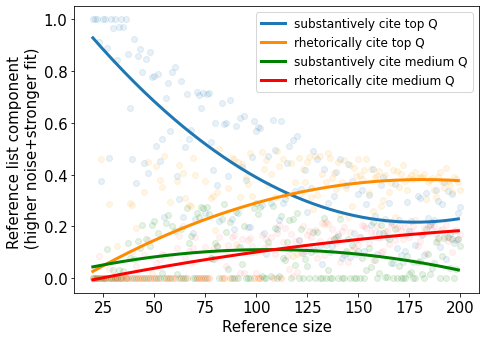

In [ ]:
import matplotlib.pyplot as plt  
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})
import numpy
from scipy.optimize import curve_fit
from numpy import arange

q=[1.0, 1.0, 1.0, 0.9130434782608695, 0.375, 1.0, 1.0, 0.8888888888888888, 0.4642857142857143, 1.0, 0.9666666666666667, 1.0, 0.84375, 0.9696969696969697, 1.0, 0.9714285714285714, 1.0, 0.8648648648648649, 0.6578947368421053, 0.46153846153846156, 0.925, 0.36585365853658536, 0.8571428571428571, 0.8837209302325582, 0.7954545454545454, 0.4444444444444444, 0.8478260869565217, 0.40425531914893614, 0.875, 0.7755102040816326, 0.78, 0.5098039215686274, 0.7884615384615384, 0.4528301886792453, 0.5370370370370371, 0.23636363636363636, 0.6964285714285714, 0.7543859649122807, 0.5689655172413793, 0.7966101694915254, 0.8166666666666667, 0.39344262295081966, 0.3064516129032258, 0.7619047619047619, 0.234375, 0.5076923076923077, 0.7121212121212122, 0.5373134328358209, 0.5735294117647058, 0.17391304347826086, 0.22857142857142856, 0.7183098591549296, 0.7083333333333334, 0.6575342465753424, 0.7162162162162162, 0.25333333333333335, 0.7105263157894737, 0.7142857142857143, 0.5256410256410257, 0.4177215189873418, 0.6, 0.35802469135802467, 0.21951219512195122, 0.6746987951807228, 0.5952380952380952, 0.6, 0.3953488372093023, 0.6896551724137931, 0.22727272727272727, 0.19101123595505617, 0.5888888888888889, 0.25274725274725274, 0.6195652173913043, 0.43010752688172044, 0.6276595744680851, 0.37894736842105264, 0.19791666666666666, 0.1958762886597938, 0.46938775510204084, 0.6060606060606061, 0.57, 0.5841584158415841, 0.5784313725490197, 0.2815533980582524, 0.17307692307692307, 0.09523809523809523, 0.4716981132075472, 0.2897196261682243, 0.6111111111111112, 0.4954128440366973, 0.19090909090909092, 0.22522522522522523, 0.6071428571428571, 0.2920353982300885, 0.30701754385964913, 0.4434782608695652, 0.5086206896551724, 0.1111111111111111, 0.5338983050847458, 0.33613445378151263, 0.55, 0.1487603305785124, 0.3442622950819672, 0.0975609756097561, 0.41935483870967744, 0.256, 0.11904761904761904, 0.3464566929133858, 0.4921875, 0.10852713178294573, 0.46153846153846156, 0.1297709923664122, 0.05303030303030303, 0.42105263157894735, 0.12686567164179105, 0.28888888888888886, 0.10294117647058823, 0.12408759124087591, 0.3188405797101449, 0.41007194244604317, 0.16428571428571428, 0.46099290780141844, 0.07746478873239436, 0.09090909090909091, 0.3611111111111111, 0.4413793103448276, 0.0821917808219178, 0.3741496598639456, 0.17567567567567569, 0.09395973154362416, 0.32666666666666666, 0.15894039735099338, 0.34210526315789475, 0.10457516339869281, 0.2857142857142857, 0.3225806451612903, 0.20512820512820512, 0.42038216560509556, 0.24050632911392406, 0.09433962264150944, 0.175, 0.36024844720496896, 0.3888888888888889, 0.22699386503067484, 0.15853658536585366, 0.2909090909090909, 0.21686746987951808, 0.059880239520958084, 0.3630952380952381, 0.11834319526627218, 0.2235294117647059, 0.08771929824561403, 0.06395348837209303, 0.10404624277456648, 0.29310344827586204, 0.18285714285714286, 0.2215909090909091, 0.062146892655367235, 0.12921348314606743, 0.31843575418994413, 0.3111111111111111, 0.16574585635359115, 0.08791208791208792, 0.32786885245901637, 0.23369565217391305, 0.20540540540540542, 0.21505376344086022, 0.22459893048128343, 0.3404255319148936, 0.2962962962962963, 0.12105263157894737, 0.2879581151832461, 0.3697916666666667, 0.07253886010362694, 0.33505154639175255, 0.16923076923076924, 0.32653061224489793, 0.13705583756345177, 0.14646464646464646, 0.25125628140703515, 0.275]
s=[0.0, 0.0, 0.0, 0.0, 0.4583333333333333, 0.0, 0.0, 0.0, 0.2857142857142857, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2894736842105263, 0.28205128205128205, 0.0, 0.1951219512195122, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.44680851063829785, 0.0, 0.02040816326530612, 0.0, 0.43137254901960786, 0.0, 0.37735849056603776, 0.35185185185185186, 0.4727272727272727, 0.0, 0.0, 0.29310344827586204, 0.0, 0.0, 0.3770491803278688, 0.43548387096774194, 0.0, 0.40625, 0.3076923076923077, 0.0, 0.2835820895522388, 0.27941176470588236, 0.463768115942029, 0.4, 0.0, 0.0, 0.0, 0.0, 0.37333333333333335, 0.0, 0.0, 0.3076923076923077, 0.31645569620253167, 0.1875, 0.3333333333333333, 0.5, 0.0, 0.0, 0.10588235294117647, 0.3488372093023256, 0.0, 0.4659090909090909, 0.4606741573033708, 0.13333333333333333, 0.45054945054945056, 0.31521739130434784, 0.44086021505376344, 0.10638297872340426, 0.3894736842105263, 0.3645833333333333, 0.4845360824742268, 0.3163265306122449, 0.0, 0.1, 0.0, 0.0, 0.4854368932038835, 0.4230769230769231, 0.45714285714285713, 0.3584905660377358, 0.40186915887850466, 0.0, 0.3119266055045872, 0.4909090909090909, 0.43243243243243246, 0.0, 0.46017699115044247, 0.32456140350877194, 0.3217391304347826, 0.11206896551724138, 0.4444444444444444, 0.0847457627118644, 0.3697478991596639, 0.09166666666666666, 0.4628099173553719, 0.32786885245901637, 0.42276422764227645, 0.3709677419354839, 0.448, 0.46825396825396826, 0.31496062992125984, 0.265625, 0.4728682170542636, 0.3230769230769231, 0.4732824427480916, 0.4015151515151515, 0.21052631578947367, 0.373134328358209, 0.48148148148148145, 0.4632352941176471, 0.38686131386861317, 0.4057971014492754, 0.34532374100719426, 0.45, 0.24822695035460993, 0.3732394366197183, 0.45454545454545453, 0.3472222222222222, 0.23448275862068965, 0.4383561643835616, 0.2789115646258503, 0.42567567567567566, 0.3959731543624161, 0.46, 0.3973509933774834, 0.3815789473684211, 0.41830065359477125, 0.461038961038961, 0.32903225806451614, 0.4230769230769231, 0.2611464968152866, 0.3924050632911392, 0.39622641509433965, 0.4125, 0.2795031055900621, 0.30246913580246915, 0.3987730061349693, 0.4451219512195122, 0.3333333333333333, 0.3674698795180723, 0.41916167664670656, 0.23809523809523808, 0.41420118343195267, 0.35294117647058826, 0.40350877192982454, 0.436046511627907, 0.37572254335260113, 0.3390804597701149, 0.38857142857142857, 0.3977272727272727, 0.384180790960452, 0.4101123595505618, 0.3854748603351955, 0.3888888888888889, 0.39226519337016574, 0.4010989010989011, 0.30601092896174864, 0.3695652173913043, 0.3783783783783784, 0.3870967741935484, 0.3422459893048128, 0.31382978723404253, 0.3915343915343915, 0.4105263157894737, 0.3717277486910995, 0.3489583333333333, 0.42487046632124353, 0.37628865979381443, 0.358974358974359, 0.33163265306122447, 0.39086294416243655, 0.3838383838383838, 0.37185929648241206, 0.34]
r=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1111111111111111, 0.0, 0.0, 0.03333333333333333, 0.0, 0.0, 0.030303030303030304, 0.0, 0.02857142857142857, 0.0, 0.13513513513513514, 0.07894736842105263, 0.0, 0.075, 0.0, 0.14285714285714285, 0.11627906976744186, 0.20454545454545456, 0.0, 0.15217391304347827, 0.0, 0.125, 0.20408163265306123, 0.22, 0.0, 0.17307692307692307, 0.0, 0.018518518518518517, 0.0, 0.21428571428571427, 0.24561403508771928, 0.0, 0.2033898305084746, 0.18333333333333332, 0.01639344262295082, 0.0, 0.19047619047619047, 0.0, 0.0, 0.2727272727272727, 0.13432835820895522, 0.16176470588235295, 0.0, 0.0, 0.2535211267605634, 0.2361111111111111, 0.273972602739726, 0.2702702702702703, 0.0, 0.27631578947368424, 0.24675324675324675, 0.07692307692307693, 0.0759493670886076, 0.1375, 0.12345679012345678, 0.0, 0.2289156626506024, 0.2857142857142857, 0.17647058823529413, 0.03488372093023256, 0.21839080459770116, 0.0, 0.0, 0.25555555555555554, 0.0, 0.11956521739130435, 0.053763440860215055, 0.20212765957446807, 0.0, 0.0, 0.0, 0.10204081632653061, 0.2727272727272727, 0.29, 0.24752475247524752, 0.27450980392156865, 0.009708737864077669, 0.0, 0.0, 0.14150943396226415, 0.009345794392523364, 0.2777777777777778, 0.1926605504587156, 0.0, 0.009009009009009009, 0.24107142857142858, 0.07964601769911504, 0.07017543859649122, 0.1391304347826087, 0.22413793103448276, 0.0, 0.2288135593220339, 0.05042016806722689, 0.25, 0.0, 0.1885245901639344, 0.0, 0.07258064516129033, 0.048, 0.0, 0.10236220472440945, 0.1796875, 0.0, 0.17692307692307693, 0.0, 0.0, 0.23308270676691728, 0.0, 0.02962962962962963, 0.0, 0.0, 0.15217391304347827, 0.15827338129496402, 0.0, 0.22695035460992907, 0.0, 0.0, 0.10416666666666667, 0.15172413793103448, 0.0, 0.1292517006802721, 0.0, 0.0, 0.10666666666666667, 0.0, 0.07894736842105263, 0.0, 0.032467532467532464, 0.11612903225806452, 0.04487179487179487, 0.21656050955414013, 0.06962025316455696, 0.0, 0.01875, 0.20496894409937888, 0.1728395061728395, 0.006134969325153374, 0.006097560975609756, 0.15151515151515152, 0.060240963855421686, 0.0, 0.19047619047619047, 0.0, 0.047058823529411764, 0.0, 0.0, 0.0, 0.08620689655172414, 0.017142857142857144, 0.022727272727272728, 0.0, 0.0, 0.061452513966480445, 0.06666666666666667, 0.016574585635359115, 0.0, 0.1912568306010929, 0.09239130434782608, 0.016216216216216217, 0.03763440860215054, 0.058823529411764705, 0.13829787234042554, 0.15343915343915343, 0.0, 0.08376963350785341, 0.15625, 0.0, 0.15979381443298968, 0.041025641025641026, 0.15306122448979592, 0.0, 0.03535353535353535, 0.1507537688442211, 0.125]
z=[0.0, 0.0, 0.0, 0.08695652173913043, 0.0, 0.0, 0.0, 0.0, 0.03571428571428571, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10256410256410256, 0.0, 0.04878048780487805, 0.0, 0.0, 0.0, 0.08888888888888889, 0.0, 0.14893617021276595, 0.0, 0.0, 0.0, 0.058823529411764705, 0.0, 0.07547169811320754, 0.09259259259259259, 0.09090909090909091, 0.0, 0.0, 0.08620689655172414, 0.0, 0.0, 0.11475409836065574, 0.16129032258064516, 0.0, 0.203125, 0.07692307692307693, 0.0, 0.1044776119402985, 0.058823529411764705, 0.11594202898550725, 0.15714285714285714, 0.0, 0.0, 0.0, 0.0, 0.12, 0.0, 0.0, 0.07692307692307693, 0.11392405063291139, 0.075, 0.12345679012345678, 0.15853658536585366, 0.0, 0.0, 0.047058823529411764, 0.12790697674418605, 0.0, 0.1590909090909091, 0.16853932584269662, 0.0, 0.12087912087912088, 0.021739130434782608, 0.15053763440860216, 0.02127659574468085, 0.10526315789473684, 0.14583333333333334, 0.15463917525773196, 0.12244897959183673, 0.0, 0.02, 0.0, 0.0, 0.1650485436893204, 0.11538461538461539, 0.1523809523809524, 0.12264150943396226, 0.1588785046728972, 0.0, 0.09174311926605505, 0.17272727272727273, 0.2072072072072072, 0.0, 0.1415929203539823, 0.19298245614035087, 0.08695652173913043, 0.034482758620689655, 0.17094017094017094, 0.00847457627118644, 0.14285714285714285, 0.025, 0.1487603305785124, 0.09836065573770492, 0.2032520325203252, 0.10483870967741936, 0.168, 0.18253968253968253, 0.15748031496062992, 0.1171875, 0.18604651162790697, 0.07692307692307693, 0.1450381679389313, 0.21212121212121213, 0.09022556390977443, 0.21641791044776118, 0.2074074074074074, 0.14705882352941177, 0.1897810218978102, 0.15217391304347827, 0.1366906474820144, 0.17142857142857143, 0.06382978723404255, 0.18309859154929578, 0.1958041958041958, 0.09722222222222222, 0.06206896551724138, 0.1780821917808219, 0.10884353741496598, 0.12162162162162163, 0.1476510067114094, 0.12666666666666668, 0.15894039735099338, 0.20394736842105263, 0.20261437908496732, 0.19480519480519481, 0.13548387096774195, 0.1794871794871795, 0.07006369426751592, 0.17721518987341772, 0.20125786163522014, 0.15625, 0.09937888198757763, 0.10493827160493827, 0.18404907975460122, 0.18292682926829268, 0.13333333333333333, 0.20481927710843373, 0.20958083832335328, 0.1488095238095238, 0.1952662721893491, 0.20588235294117646, 0.18128654970760233, 0.1511627906976744, 0.19653179190751446, 0.1724137931034483, 0.16, 0.18181818181818182, 0.2033898305084746, 0.2247191011235955, 0.12290502793296089, 0.14444444444444443, 0.1712707182320442, 0.19230769230769232, 0.09836065573770492, 0.20108695652173914, 0.21081081081081082, 0.1881720430107527, 0.20320855614973263, 0.1702127659574468, 0.14285714285714285, 0.18421052631578946, 0.18848167539267016, 0.16145833333333334, 0.20725388601036268, 0.14432989690721648, 0.15384615384615385, 0.10204081632653061, 0.18274111675126903, 0.18686868686868688, 0.1507537688442211, 0.17]

x= numpy.arange(20, 201, 1)

# define the true objective function
def objective(x, a, b, c):
	return a * x **2 + x* b + c

popt1, _ = curve_fit(objective, x, q)
popt2, _ = curve_fit(objective, x, s)
popt3, _ = curve_fit(objective, x, r)
popt4, _ = curve_fit(objective, x, z)
# summarize the parameter values
a, b, c = popt1
d, e, f =popt2
g, h, i =popt3
j, k, l =popt4
# plot input vs output
plt.scatter(x, q, marker='o',norm =0, color='#1f77b4', alpha =0.1)
plt.scatter(x, s, marker='o',norm =0, color='orange', alpha =0.1)
plt.scatter(x, r, marker='o',norm =0, color='green', alpha =0.1)
plt.scatter(x, z, marker='o',norm =0, color='red', alpha =0.05)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line1 = objective(x_line, a, b, c)
y_line2  = objective(x_line, d, e, f)
y_line3  = objective(x_line, g, h, i)
y_line4  = objective(x_line, j, k, l)
# create a line plot for the mapping function
plt.plot(x_line, y_line1, '-', color='#1f77b4', label='substantively cite top Q', linewidth=3)
plt.plot(x_line, y_line2, '-', color='darkorange', label='rhetorically cite top Q',linewidth=3)
plt.plot(x_line, y_line3, '-', color='green', label='substantively cite medium Q',linewidth=3)
plt.plot(x_line, y_line4, '-', color='red',label='rhetorically cite medium Q', linewidth=3)
plt.xlabel('Reference size')
plt.ylabel('Reference list component \n (higher noise+stronger fit)')
plt.legend(loc='upper right', prop={'size': 12})
plt.show()

# Fit 0.1 Noise 0.05

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


<Figure size 540x1080 with 0 Axes>

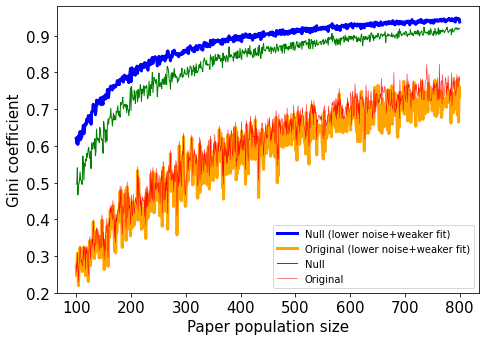

<Figure size 540x1080 with 0 Axes>

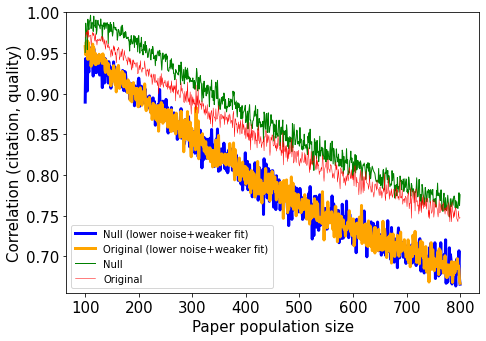

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import seaborn as sns
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})
import numpy
data =pd.read_csv('ginicorr_lown.csv',error_bad_lines=False, engine="python")
x= numpy.arange(100, 801, 1)
a=data['Null - Gini']
c=data['Original - Gini']
a1=data['ONull - Gini']
c1=data['OOriginal - Gini']
plt.plot(x, a, label='Null (lower noise+weaker fit)', linewidth =3, color='b')
plt.plot(x, c, label='Original (lower noise+weaker fit)', linewidth =3,  color='orange')
plt.plot(x, a1, label='Null', linewidth =1, color='g')
plt.plot(x, c1, label='Original', linewidth =.5,color='r')
plt.xlabel('Paper population size')
plt.ylabel('Gini coefficient')
plt.legend(loc='lower right', prop={'size': 10})
plt.ylim(0.2,0.98)
plt.show()

test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})
b= data['Null - Corr']
d= data['Original - Corr']
b1= data['ONull - Corr']
d1= data['OOriginal - Corr']
plt.xlabel('Paper population size')
plt.ylabel('Correlation (citation, quality)')
plt.plot(x, b, label='Null (lower noise+weaker fit)', linewidth =3, color='b')
plt.plot(x, d, label='Original (lower noise+weaker fit)', linewidth =3,  color='orange')
plt.plot(x, b1, label='Null', linewidth =1, color='g')
plt.plot(x, d1, label='Original', linewidth =.5,color='r')
plt.legend(loc='lower left', prop={'size': 10})
plt.ylim(0.655,1)
plt.show()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


<Figure size 540x1080 with 0 Axes>

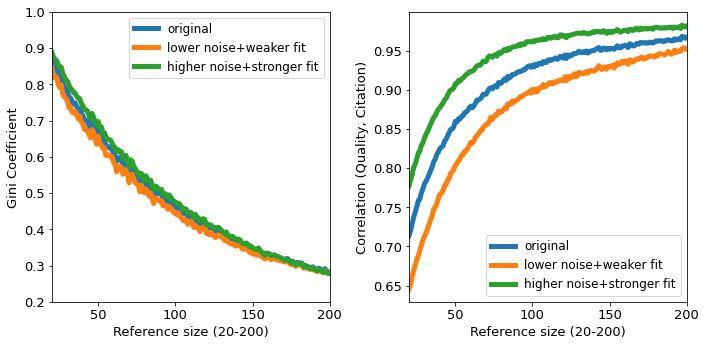

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
test = plt.figure()
fig, ax = plt.subplots(figsize=(10, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 13})
import numpy
data1 =pd.read_csv('compare_noise.csv',error_bad_lines=False, engine="python")
x1= numpy.arange(20, 201, 1)

plt.subplot(1, 2, 1)
b= data1['Ref 20-200 Gini']
b1=data1['L-Gini']
b2=data1['H-Gini']
plt.plot(x1, b,  linewidth =5, label='original')
plt.plot(x1, b1,  linewidth =5, label='lower noise+weaker fit')
plt.plot(x1, b2,  linewidth =5,label='higher noise+stronger fit')
plt.xlabel('Reference size (20-200)')
plt.ylabel('Gini Coefficient')
plt.legend(loc='upper right', prop={'size': 12})
plt.xlim(20,200)
plt.ylim(0.2,1)
#plt.title("The impact of reference size (20-200) on inequality")

plt.subplot(1, 2, 2)
a= data1['Ref 20-200 corr']
a1=data1['L-Corr']
a2=data1['H-Corr']
plt.plot(x1, a,  linewidth =5, label='original')
plt.plot(x1, a1,  linewidth =5, label='lower noise+weaker fit')
plt.plot(x1, a2,  linewidth =5,label='higher noise+stronger fit')
plt.xlabel('Reference size (20-200)')
plt.ylabel('Correlation (Quality, Citation)')

plt.xlim(20,200)
plt.legend(loc='lower right', prop={'size': 12})
#plt.title("The impact of reference size (20-200) on corr(Q, C)")
plt.show()

<Figure size 540x1080 with 0 Axes>

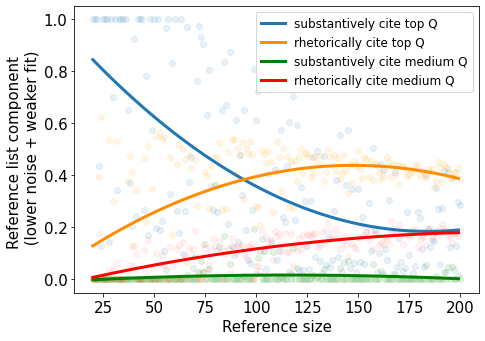

In [ ]:
q=[1.0, 1.0, 1.0, 0.43478260869565216, 0.125, 1.0, 1.0, 1.0, 0.14285714285714285, 1.0, 0.7, 1.0, 0.34375, 1.0, 1.0, 1.0, 1.0, 0.6486486486486487, 0.3684210526315789, 0.20512820512820512, 0.925, 0.24390243902439024, 1.0, 1.0, 1.0, 0.26666666666666666, 0.782608695652174, 0.1702127659574468, 1.0, 0.5714285714285714, 1.0, 0.19607843137254902, 1.0, 0.18867924528301888, 0.2222222222222222, 0.10909090909090909, 0.9642857142857143, 1.0, 0.3275862068965517, 0.8305084745762712, 1.0, 0.26229508196721313, 0.1774193548387097, 1.0, 0.09375, 0.26153846153846155, 0.9696969696969697, 0.373134328358209, 0.47058823529411764, 0.043478260869565216, 0.08571428571428572, 0.7605633802816901, 0.9722222222222222, 0.9315068493150684, 0.9054054054054054, 0.13333333333333333, 0.631578947368421, 0.8051948051948052, 0.358974358974359, 0.26582278481012656, 0.3625, 0.25925925925925924, 0.12195121951219512, 0.6506024096385542, 0.8333333333333334, 0.6705882352941176, 0.20930232558139536, 0.8735632183908046, 0.125, 0.0898876404494382, 0.6111111111111112, 0.14285714285714285, 0.4782608695652174, 0.3225806451612903, 0.648936170212766, 0.18947368421052632, 0.07291666666666667, 0.061855670103092786, 0.2653061224489796, 0.8080808080808081, 0.61, 0.7227722772277227, 0.7647058823529411, 0.1553398058252427, 0.10576923076923077, 0.0380952380952381, 0.4056603773584906, 0.14018691588785046, 0.7407407407407407, 0.42201834862385323, 0.07272727272727272, 0.10810810810810811, 0.5714285714285714, 0.23893805309734514, 0.21929824561403508, 0.43478260869565216, 0.603448275862069, 0.017094017094017096, 0.7033898305084746, 0.226890756302521, 0.5916666666666667, 0.03305785123966942, 0.3524590163934426, 0.032520325203252036, 0.29838709677419356, 0.128, 0.03968253968253968, 0.2992125984251969, 0.46875, 0.08527131782945736, 0.49230769230769234, 0.06870229007633588, 0.022727272727272728, 0.47368421052631576, 0.05223880597014925, 0.16296296296296298, 0.04411764705882353, 0.072992700729927, 0.2608695652173913, 0.381294964028777, 0.08571428571428572, 0.5531914893617021, 0.028169014084507043, 0.06293706293706294, 0.3611111111111111, 0.5724137931034483, 0.0410958904109589, 0.3469387755102041, 0.060810810810810814, 0.026845637583892617, 0.3466666666666667, 0.06622516556291391, 0.23684210526315788, 0.058823529411764705, 0.18181818181818182, 0.2903225806451613, 0.10897435897435898, 0.5031847133757962, 0.189873417721519, 0.025157232704402517, 0.1, 0.4409937888198758, 0.41975308641975306, 0.1165644171779141, 0.07317073170731707, 0.30303030303030304, 0.1746987951807229, 0.017964071856287425, 0.4107142857142857, 0.047337278106508875, 0.1588235294117647, 0.06432748538011696, 0.029069767441860465, 0.04046242774566474, 0.25862068965517243, 0.09142857142857143, 0.18181818181818182, 0.022598870056497175, 0.05056179775280899, 0.2569832402234637, 0.23333333333333334, 0.11602209944751381, 0.04395604395604396, 0.3989071038251366, 0.19021739130434784, 0.12432432432432433, 0.15053763440860216, 0.1443850267379679, 0.35106382978723405, 0.2698412698412698, 0.05789473684210526, 0.27225130890052357, 0.4166666666666667, 0.025906735751295335, 0.41237113402061853, 0.12307692307692308, 0.3877551020408163, 0.03553299492385787, 0.12626262626262627, 0.2964824120603015, 0.285]
s=[0.0, 0.0, 0.0, 0.391304347826087, 0.625, 0.0, 0.0, 0.0, 0.5357142857142857, 0.0, 0.3, 0.0, 0.53125, 0.0, 0.0, 0.0, 0.0, 0.3783783783783784, 0.47368421052631576, 0.41025641025641024, 0.125, 0.34146341463414637, 0.0, 0.0, 0.0, 0.4666666666666667, 0.21739130434782608, 0.5106382978723404, 0.0, 0.3469387755102041, 0.0, 0.5490196078431373, 0.0, 0.5660377358490566, 0.5370370370370371, 0.5454545454545454, 0.0, 0.0, 0.46551724137931033, 0.1694915254237288, 0.0, 0.4426229508196721, 0.5161290322580645, 0.0, 0.5, 0.46153846153846156, 0.06060606060606061, 0.47761194029850745, 0.4264705882352941, 0.5072463768115942, 0.45714285714285713, 0.28169014084507044, 0.0, 0.0, 0.13513513513513514, 0.41333333333333333, 0.39473684210526316, 0.2727272727272727, 0.4358974358974359, 0.46835443037974683, 0.3625, 0.4691358024691358, 0.524390243902439, 0.26506024096385544, 0.0, 0.27058823529411763, 0.4883720930232558, 0.11494252873563218, 0.5340909090909091, 0.5393258426966292, 0.4, 0.5054945054945055, 0.4782608695652174, 0.5268817204301075, 0.30851063829787234, 0.5052631578947369, 0.4791666666666667, 0.5257731958762887, 0.47959183673469385, 0.0, 0.28, 0.27722772277227725, 0.20588235294117646, 0.49514563106796117, 0.4807692307692308, 0.44761904761904764, 0.49056603773584906, 0.4485981308411215, 0.25925925925925924, 0.41284403669724773, 0.5272727272727272, 0.46846846846846846, 0.3392857142857143, 0.504424778761062, 0.41228070175438597, 0.46956521739130436, 0.27586206896551724, 0.452991452991453, 0.2711864406779661, 0.453781512605042, 0.375, 0.47107438016528924, 0.5, 0.4065040650406504, 0.4838709677419355, 0.48, 0.46825396825396826, 0.3937007874015748, 0.40625, 0.4728682170542636, 0.4461538461538462, 0.4732824427480916, 0.4393939393939394, 0.37593984962406013, 0.41044776119402987, 0.4962962962962963, 0.47058823529411764, 0.43795620437956206, 0.4782608695652174, 0.4172661870503597, 0.4642857142857143, 0.3829787234042553, 0.4084507042253521, 0.4755244755244755, 0.4166666666666667, 0.3310344827586207, 0.4383561643835616, 0.3673469387755102, 0.4527027027027027, 0.436241610738255, 0.49333333333333335, 0.423841059602649, 0.3881578947368421, 0.47058823529411764, 0.461038961038961, 0.3935483870967742, 0.4551282051282051, 0.3821656050955414, 0.4430379746835443, 0.44025157232704404, 0.4125, 0.38509316770186336, 0.3950617283950617, 0.4233128834355828, 0.4695121951219512, 0.4484848484848485, 0.39156626506024095, 0.437125748502994, 0.40476190476190477, 0.4378698224852071, 0.36470588235294116, 0.4327485380116959, 0.436046511627907, 0.42196531791907516, 0.39655172413793105, 0.4, 0.42045454545454547, 0.4124293785310734, 0.43820224719101125, 0.43575418994413406, 0.4, 0.4143646408839779, 0.4010989010989011, 0.3879781420765027, 0.42391304347826086, 0.41081081081081083, 0.42473118279569894, 0.35294117647058826, 0.3776595744680851, 0.4497354497354497, 0.43157894736842106, 0.3717277486910995, 0.4427083333333333, 0.43005181347150256, 0.42783505154639173, 0.38974358974358975, 0.39285714285714285, 0.41116751269035534, 0.4090909090909091, 0.4271356783919598, 0.385]
r=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03571428571428571, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015151515151515152, 0.0, 0.0, 0.0, 0.0, 0.0, 0.027777777777777776, 0.0684931506849315, 0.02702702702702703, 0.0, 0.0, 0.03896103896103896, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16666666666666666, 0.0, 0.0, 0.05747126436781609, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010638297872340425, 0.0, 0.0, 0.0, 0.0, 0.1919191919191919, 0.02, 0.07920792079207921, 0.10784313725490197, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10185185185185185, 0.0, 0.0, 0.0, 0.008928571428571428, 0.0, 0.0, 0.0, 0.02586206896551724, 0.0, 0.11864406779661017, 0.0, 0.041666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.007692307692307693, 0.0, 0.0, 0.03759398496240601, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0425531914893617, 0.0, 0.0, 0.0, 0.06896551724137931, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05732484076433121, 0.0, 0.0, 0.0, 0.031055900621118012, 0.018518518518518517, 0.0, 0.0, 0.0, 0.0, 0.0, 0.017857142857142856, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0546448087431694, 0.0, 0.0, 0.0, 0.0, 0.010638297872340425, 0.0, 0.0, 0.0, 0.026041666666666668, 0.0, 0.04639175257731959, 0.0, 0.04591836734693878, 0.0, 0.0, 0.010050251256281407, 0.0]
z=[0.0, 0.0, 0.0, 0.17391304347826086, 0.0, 0.0, 0.0, 0.0, 0.03571428571428571, 0.0, 0.03333333333333333, 0.0, 0.0625, 0.0, 0.0, 0.0, 0.0, 0.02702702702702703, 0.05263157894736842, 0.1282051282051282, 0.05, 0.0975609756097561, 0.0, 0.0, 0.0, 0.1111111111111111, 0.021739130434782608, 0.14893617021276595, 0.0, 0.04081632653061224, 0.0, 0.09803921568627451, 0.0, 0.05660377358490566, 0.09259259259259259, 0.05454545454545454, 0.0, 0.0, 0.1206896551724138, 0.05084745762711865, 0.0, 0.11475409836065574, 0.12903225806451613, 0.0, 0.140625, 0.09230769230769231, 0.0, 0.11940298507462686, 0.08823529411764706, 0.11594202898550725, 0.18571428571428572, 0.028169014084507043, 0.0, 0.0, 0.02702702702702703, 0.12, 0.039473684210526314, 0.05194805194805195, 0.11538461538461539, 0.1518987341772152, 0.125, 0.1111111111111111, 0.14634146341463414, 0.12048192771084337, 0.0, 0.09411764705882353, 0.11627906976744186, 0.022988505747126436, 0.1590909090909091, 0.12359550561797752, 0.1, 0.13186813186813187, 0.11956521739130435, 0.12903225806451613, 0.09574468085106383, 0.08421052631578947, 0.125, 0.12371134020618557, 0.1326530612244898, 0.0, 0.05, 0.04950495049504951, 0.029411764705882353, 0.18446601941747573, 0.10576923076923077, 0.1619047619047619, 0.14150943396226415, 0.14953271028037382, 0.07407407407407407, 0.1834862385321101, 0.16363636363636364, 0.17117117117117117, 0.10714285714285714, 0.13274336283185842, 0.17543859649122806, 0.10434782608695652, 0.10344827586206896, 0.17094017094017094, 0.05084745762711865, 0.13445378151260504, 0.10833333333333334, 0.15702479338842976, 0.11475409836065574, 0.17073170731707318, 0.12903225806451613, 0.168, 0.1746031746031746, 0.16535433070866143, 0.171875, 0.17829457364341086, 0.12307692307692308, 0.1297709923664122, 0.18181818181818182, 0.13533834586466165, 0.1865671641791045, 0.21481481481481482, 0.15441176470588236, 0.17518248175182483, 0.15217391304347827, 0.19424460431654678, 0.15714285714285714, 0.11347517730496454, 0.14084507042253522, 0.16083916083916083, 0.13194444444444445, 0.0896551724137931, 0.1643835616438356, 0.1360544217687075, 0.12162162162162163, 0.11409395973154363, 0.16, 0.15894039735099338, 0.21052631578947367, 0.16993464052287582, 0.2012987012987013, 0.14838709677419354, 0.1858974358974359, 0.11464968152866242, 0.17088607594936708, 0.1761006289308176, 0.13125, 0.13664596273291926, 0.13580246913580246, 0.15950920245398773, 0.1524390243902439, 0.13333333333333333, 0.22289156626506024, 0.19760479041916168, 0.17857142857142858, 0.1834319526627219, 0.21176470588235294, 0.18128654970760233, 0.13372093023255813, 0.1791907514450867, 0.1724137931034483, 0.16, 0.17045454545454544, 0.1864406779661017, 0.19101123595505617, 0.12290502793296089, 0.15, 0.16022099447513813, 0.16483516483516483, 0.13114754098360656, 0.19021739130434784, 0.1945945945945946, 0.16129032258064516, 0.17647058823529413, 0.18085106382978725, 0.1693121693121693, 0.19473684210526315, 0.2094240837696335, 0.1875, 0.19170984455958548, 0.16494845360824742, 0.1641025641025641, 0.1377551020408163, 0.17258883248730963, 0.17676767676767677, 0.1658291457286432, 0.185]
import matplotlib.pyplot as plt  
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})
import numpy
from scipy.optimize import curve_fit
from numpy import arange

x= numpy.arange(20, 201, 1)

# define the true objective function
def objective(x, a, b, c):
	return a * x **2 + x* b + c

popt1, _ = curve_fit(objective, x, q)
popt2, _ = curve_fit(objective, x, s)
popt3, _ = curve_fit(objective, x, r)
popt4, _ = curve_fit(objective, x, z)
# summarize the parameter values
a, b, c = popt1
d, e, f =popt2
g, h, i =popt3
j, k, l =popt4
# plot input vs output
plt.scatter(x, q, marker='o',norm =0, color='#1f77b4', alpha =0.1)
plt.scatter(x, s, marker='o',norm =0, color='orange', alpha =0.1)
plt.scatter(x, r, marker='o',norm =0, color='green', alpha =0.1)
plt.scatter(x, z, marker='o',norm =0, color='red', alpha =0.05)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line1 = objective(x_line, a, b, c)
y_line2  = objective(x_line, d, e, f)
y_line3  = objective(x_line, g, h, i)
y_line4  = objective(x_line, j, k, l)
# create a line plot for the mapping function
plt.plot(x_line, y_line1, '-', color='#1f77b4', label='substantively cite top Q', linewidth=3)
plt.plot(x_line, y_line2, '-', color='darkorange', label='rhetorically cite top Q',linewidth=3)
plt.plot(x_line, y_line3, '-', color='green', label='substantively cite medium Q',linewidth=3)
plt.plot(x_line, y_line4, '-', color='red',label='rhetorically cite medium Q', linewidth=3)
plt.xlabel('Reference size')
plt.ylabel('Reference list component \n (lower noise + weaker fit)')
plt.legend(loc='upper right', prop={'size': 12})
plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


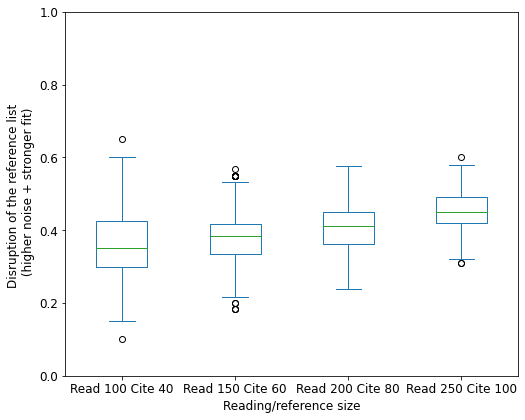

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


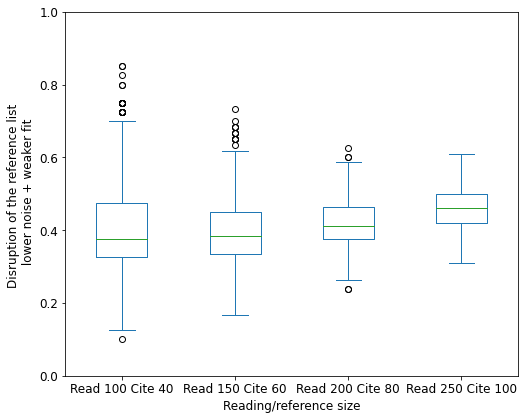

In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd 

plt.rcParams["figure.figsize"] = [7.50, 6]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 12})
data1 =pd.read_csv('disrup_h.csv',error_bad_lines=False, engine="python")
# Creating axes instance
ax = data1[['Read 100 Cite 40','Read 150 Cite 60','Read 200 Cite 80','Read 250 Cite 100']].plot(kind='box')
plt.xlabel('Reading/reference size')
plt.ylabel('Disruption of the reference list \n (higher noise + stronger fit)')
plt.ylim(0,1)
plt.show()

plt.rcParams["figure.figsize"] = [7.50, 6]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 12})
data2 =pd.read_csv('disrup_l.csv',error_bad_lines=False, engine="python")
# Creating axes instance
ax = data2[['Read 100 Cite 40','Read 150 Cite 60','Read 200 Cite 80','Read 250 Cite 100']].plot(kind='box')
plt.xlabel('Reading/reference size')
plt.ylabel('Disruption of the reference list \n lower noise + weaker fit')
plt.ylim(0,1)
plt.show()

#beta(1, 3.5)

In [ ]:
q=[1.0, 1.0, 1.0, 1.0, 0.6666666666666666, 1.0, 1.0, 1.0, 0.9642857142857143, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9428571428571428, 1.0, 1.0, 1.0, 0.717948717948718, 1.0, 0.7804878048780488, 0.9761904761904762, 1.0, 0.9545454545454546, 0.8444444444444444, 0.9782608695652174, 0.6808510638297872, 0.9791666666666666, 0.9795918367346939, 0.98, 0.7647058823529411, 1.0, 0.6981132075471698, 0.8148148148148148, 0.43636363636363634, 0.9642857142857143, 0.9298245614035088, 0.8275862068965517, 0.9152542372881356, 0.9333333333333333, 0.6557377049180327, 0.5645161290322581, 0.9365079365079365, 0.5, 0.8153846153846154, 0.9242424242424242, 0.9104477611940298, 0.8823529411764706, 0.30434782608695654, 0.44285714285714284, 0.8732394366197183, 0.8611111111111112, 0.821917808219178, 0.8108108108108109, 0.4666666666666667, 0.8026315789473685, 0.8571428571428571, 0.7948717948717948, 0.6835443037974683, 0.875, 0.6419753086419753, 0.3902439024390244, 0.8072289156626506, 0.7380952380952381, 0.8352941176470589, 0.5697674418604651, 0.8390804597701149, 0.3977272727272727, 0.3707865168539326, 0.7555555555555555, 0.4725274725274725, 0.782608695652174, 0.6559139784946236, 0.7978723404255319, 0.631578947368421, 0.3645833333333333, 0.28865979381443296, 0.5510204081632653, 0.7171717171717171, 0.71, 0.7920792079207921, 0.7058823529411765, 0.46601941747572817, 0.3942307692307692, 0.2, 0.6698113207547169, 0.3925233644859813, 0.7407407407407407, 0.6605504587155964, 0.34545454545454546, 0.40540540540540543, 0.7232142857142857, 0.6017699115044248, 0.5526315789473685, 0.6695652173913044, 0.6896551724137931, 0.10256410256410256, 0.6864406779661016, 0.5546218487394958, 0.6583333333333333, 0.2809917355371901, 0.6147540983606558, 0.16260162601626016, 0.6129032258064516, 0.408, 0.18253968253968253, 0.5354330708661418, 0.6328125, 0.20155038759689922, 0.6384615384615384, 0.19083969465648856, 0.12878787878787878, 0.6390977443609023, 0.21641791044776118, 0.37037037037037035, 0.15441176470588236, 0.24817518248175183, 0.5217391304347826, 0.5755395683453237, 0.30714285714285716, 0.6382978723404256, 0.13380281690140844, 0.22377622377622378, 0.5694444444444444, 0.6344827586206897, 0.19863013698630136, 0.564625850340136, 0.27702702702702703, 0.1610738255033557, 0.4866666666666667, 0.25165562913907286, 0.4276315789473684, 0.1830065359477124, 0.42207792207792205, 0.47096774193548385, 0.3076923076923077, 0.5732484076433121, 0.3987341772151899, 0.15723270440251572, 0.2625, 0.5652173913043478, 0.5432098765432098, 0.3374233128834356, 0.25609756097560976, 0.4727272727272727, 0.40963855421686746, 0.11976047904191617, 0.4880952380952381, 0.21893491124260356, 0.3941176470588235, 0.22807017543859648, 0.11627906976744186, 0.1791907514450867, 0.3735632183908046, 0.29714285714285715, 0.32386363636363635, 0.11864406779661017, 0.17415730337078653, 0.43575418994413406, 0.4222222222222222, 0.3149171270718232, 0.14835164835164835, 0.4426229508196721, 0.33695652173913043, 0.31351351351351353, 0.3225806451612903, 0.36363636363636365, 0.4521276595744681, 0.42328042328042326, 0.1631578947368421, 0.418848167539267, 0.46875, 0.09844559585492228, 0.4587628865979381, 0.28717948717948716, 0.4744897959183674, 0.19796954314720813, 0.24242424242424243, 0.3869346733668342, 0.43]
s=[0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.10714285714285714, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3076923076923077, 0.0, 0.2926829268292683, 0.0, 0.0, 0.0, 0.1111111111111111, 0.0, 0.2765957446808511, 0.0, 0.0, 0.0, 0.3137254901960784, 0.0, 0.3018867924528302, 0.2037037037037037, 0.43636363636363634, 0.0, 0.0, 0.13793103448275862, 0.0, 0.0, 0.4262295081967213, 0.3225806451612903, 0.0, 0.40625, 0.26153846153846155, 0.0, 0.1044776119402985, 0.0, 0.42028985507246375, 0.35714285714285715, 0.0, 0.0, 0.0, 0.0, 0.41333333333333333, 0.0, 0.0, 0.20512820512820512, 0.22784810126582278, 0.0, 0.4074074074074074, 0.4268292682926829, 0.0, 0.0, 0.0, 0.29069767441860467, 0.0, 0.4090909090909091, 0.4606741573033708, 0.0, 0.46153846153846156, 0.10869565217391304, 0.23655913978494625, 0.0, 0.35789473684210527, 0.3333333333333333, 0.4536082474226804, 0.336734693877551, 0.0, 0.0, 0.0, 0.0, 0.3883495145631068, 0.3942307692307692, 0.47619047619047616, 0.1509433962264151, 0.42990654205607476, 0.0, 0.08256880733944955, 0.42727272727272725, 0.5045045045045045, 0.0, 0.22123893805309736, 0.2719298245614035, 0.1391304347826087, 0.0, 0.46153846153846156, 0.0, 0.36134453781512604, 0.0, 0.4132231404958678, 0.18032786885245902, 0.3983739837398374, 0.31451612903225806, 0.4, 0.4603174603174603, 0.33070866141732286, 0.1484375, 0.40310077519379844, 0.0, 0.40458015267175573, 0.4015151515151515, 0.015037593984962405, 0.44029850746268656, 0.45185185185185184, 0.3897058823529412, 0.4744525547445255, 0.2028985507246377, 0.18705035971223022, 0.45714285714285713, 0.0, 0.43661971830985913, 0.4755244755244755, 0.2638888888888889, 0.0, 0.4520547945205479, 0.2789115646258503, 0.40540540540540543, 0.4563758389261745, 0.2733333333333333, 0.4105960264900662, 0.4144736842105263, 0.39215686274509803, 0.34415584415584416, 0.27741935483870966, 0.4166666666666667, 0.0, 0.3987341772151899, 0.44025157232704404, 0.4125, 0.19254658385093168, 0.12962962962962962, 0.36809815950920244, 0.4451219512195122, 0.21818181818181817, 0.40963855421686746, 0.40119760479041916, 0.2619047619047619, 0.4378698224852071, 0.38235294117647056, 0.40350877192982454, 0.3953488372093023, 0.3930635838150289, 0.367816091954023, 0.35428571428571426, 0.3977272727272727, 0.3615819209039548, 0.398876404494382, 0.3575418994413408, 0.36666666666666664, 0.3701657458563536, 0.38461538461538464, 0.273224043715847, 0.3967391304347826, 0.3783783783783784, 0.3655913978494624, 0.36363636363636365, 0.2925531914893617, 0.3386243386243386, 0.39473684210526316, 0.2879581151832461, 0.2708333333333333, 0.41968911917098445, 0.25257731958762886, 0.41025641025641024, 0.25510204081632654, 0.39086294416243655, 0.37373737373737376, 0.3065326633165829, 0.305]
r=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05714285714285714, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.023809523809523808, 0.0, 0.045454545454545456, 0.0, 0.021739130434782608, 0.0, 0.020833333333333332, 0.02040816326530612, 0.02, 0.0, 0.0, 0.018867924528301886, 0.0, 0.0, 0.03571428571428571, 0.07017543859649122, 0.06896551724137931, 0.0847457627118644, 0.06666666666666667, 0.01639344262295082, 0.016129032258064516, 0.06349206349206349, 0.0, 0.015384615384615385, 0.07575757575757576, 0.05970149253731343, 0.11764705882352941, 0.0, 0.0, 0.1267605633802817, 0.1388888888888889, 0.1780821917808219, 0.1891891891891892, 0.0, 0.19736842105263158, 0.14285714285714285, 0.08974358974358974, 0.06329113924050633, 0.125, 0.09876543209876543, 0.0, 0.1927710843373494, 0.2619047619047619, 0.16470588235294117, 0.046511627906976744, 0.16091954022988506, 0.011363636363636364, 0.0, 0.24444444444444444, 0.0, 0.16304347826086957, 0.10752688172043011, 0.18085106382978725, 0.010526315789473684, 0.0, 0.0, 0.10204081632653061, 0.25252525252525254, 0.28, 0.19801980198019803, 0.28431372549019607, 0.019417475728155338, 0.0, 0.0, 0.22641509433962265, 0.018691588785046728, 0.24074074074074073, 0.30275229357798167, 0.0, 0.009009009009009009, 0.25892857142857145, 0.09734513274336283, 0.08771929824561403, 0.26956521739130435, 0.27586206896551724, 0.0, 0.2711864406779661, 0.04201680672268908, 0.30833333333333335, 0.0, 0.22950819672131148, 0.0, 0.14516129032258066, 0.048, 0.0, 0.14960629921259844, 0.2265625, 0.0, 0.27692307692307694, 0.0, 0.0, 0.3157894736842105, 0.0, 0.022222222222222223, 0.0, 0.0, 0.2246376811594203, 0.2014388489208633, 0.0, 0.28368794326241137, 0.0, 0.0, 0.1736111111111111, 0.3103448275862069, 0.0, 0.2108843537414966, 0.006756756756756757, 0.0, 0.14666666666666667, 0.0, 0.11842105263157894, 0.0, 0.07792207792207792, 0.18064516129032257, 0.057692307692307696, 0.34394904458598724, 0.08860759493670886, 0.0, 0.01875, 0.2732919254658385, 0.2716049382716049, 0.0, 0.0, 0.21212121212121213, 0.09036144578313253, 0.0, 0.2857142857142857, 0.0, 0.052941176470588235, 0.005847953216374269, 0.0, 0.0, 0.12643678160919541, 0.04, 0.0625, 0.0, 0.0, 0.12849162011173185, 0.09444444444444444, 0.03314917127071823, 0.0, 0.2459016393442623, 0.09782608695652174, 0.032432432432432434, 0.043010752688172046, 0.0962566844919786, 0.19680851063829788, 0.19576719576719576, 0.0, 0.11518324607329843, 0.20833333333333334, 0.0, 0.23711340206185566, 0.035897435897435895, 0.17346938775510204, 0.0, 0.050505050505050504, 0.23618090452261306, 0.15]
z=[0.0, 0.0, 0.0, 0.0, 0.08333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02564102564102564, 0.0, 0.024390243902439025, 0.0, 0.0, 0.0, 0.022222222222222223, 0.0, 0.0851063829787234, 0.0, 0.0, 0.0, 0.0392156862745098, 0.0, 0.05660377358490566, 0.018518518518518517, 0.21818181818181817, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04918032786885246, 0.11290322580645161, 0.0, 0.15625, 0.046153846153846156, 0.0, 0.0, 0.0, 0.057971014492753624, 0.14285714285714285, 0.0, 0.0, 0.0, 0.0, 0.16, 0.0, 0.0, 0.038461538461538464, 0.08860759493670886, 0.0, 0.09876543209876543, 0.15853658536585366, 0.0, 0.0, 0.0, 0.06976744186046512, 0.0, 0.13636363636363635, 0.15730337078651685, 0.0, 0.12087912087912088, 0.021739130434782608, 0.021505376344086023, 0.0, 0.07368421052631578, 0.21875, 0.13402061855670103, 0.05102040816326531, 0.0, 0.0, 0.0, 0.0, 0.13592233009708737, 0.16346153846153846, 0.14285714285714285, 0.02830188679245283, 0.1308411214953271, 0.0, 0.0, 0.18181818181818182, 0.11711711711711711, 0.0, 0.08849557522123894, 0.06140350877192982, 0.02608695652173913, 0.0, 0.17094017094017094, 0.0, 0.10084033613445378, 0.0, 0.15702479338842976, 0.08196721311475409, 0.23577235772357724, 0.056451612903225805, 0.16, 0.19047619047619047, 0.05511811023622047, 0.0625, 0.18604651162790697, 0.0, 0.1984732824427481, 0.19696969696969696, 0.007518796992481203, 0.15671641791044777, 0.18518518518518517, 0.19117647058823528, 0.11678832116788321, 0.10144927536231885, 0.09352517985611511, 0.14285714285714285, 0.0, 0.18309859154929578, 0.15384615384615385, 0.09722222222222222, 0.0, 0.2054794520547945, 0.034013605442176874, 0.16216216216216217, 0.1610738255033557, 0.13333333333333333, 0.16556291390728478, 0.13815789473684212, 0.1830065359477124, 0.13636363636363635, 0.15483870967741936, 0.16666666666666666, 0.0, 0.12658227848101267, 0.1761006289308176, 0.14375, 0.043478260869565216, 0.08024691358024691, 0.1656441717791411, 0.18902439024390244, 0.1393939393939394, 0.18674698795180722, 0.20359281437125748, 0.1130952380952381, 0.20710059171597633, 0.15294117647058825, 0.17543859649122806, 0.18604651162790697, 0.1791907514450867, 0.19540229885057472, 0.16, 0.19318181818181818, 0.22598870056497175, 0.17415730337078653, 0.18994413407821228, 0.15, 0.1878453038674033, 0.19230769230769232, 0.1092896174863388, 0.15217391304347827, 0.20540540540540542, 0.15591397849462366, 0.1657754010695187, 0.11170212765957446, 0.14285714285714285, 0.20526315789473684, 0.11518324607329843, 0.11979166666666667, 0.21243523316062177, 0.08762886597938144, 0.18974358974358974, 0.08163265306122448, 0.19796954314720813, 0.17676767676767677, 0.09547738693467336, 0.12]
import matplotlib.pyplot as plt  
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})
import numpy
from scipy.optimize import curve_fit
from numpy import arange

x= numpy.arange(20, 201, 1)

# define the true objective function
def objective(x, a, b, c):
	return a * x **2 + x* b + c

popt1, _ = curve_fit(objective, x, q)
popt2, _ = curve_fit(objective, x, s)
popt3, _ = curve_fit(objective, x, r)
popt4, _ = curve_fit(objective, x, z)
# summarize the parameter values
a, b, c = popt1
d, e, f =popt2
g, h, i =popt3
j, k, l =popt4
# plot input vs output
plt.scatter(x, q, marker='o',norm =0, color='#1f77b4', alpha =0.1)
plt.scatter(x, s, marker='o',norm =0, color='orange', alpha =0.1)
plt.scatter(x, r, marker='o',norm =0, color='green', alpha =0.1)
plt.scatter(x, z, marker='o',norm =0, color='red', alpha =0.05)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line1 = objective(x_line, a, b, c)
y_line2  = objective(x_line, d, e, f)
y_line3  = objective(x_line, g, h, i)
y_line4  = objective(x_line, j, k, l)
# create a line plot for the mapping function
plt.plot(x_line, y_line1, '-', color='#1f77b4', label='substantively cite top Q', linewidth=3)
plt.plot(x_line, y_line2, '-', color='darkorange', label='rhetorically cite top Q',linewidth=3)
plt.plot(x_line, y_line3, '-', color='green', label='substantively cite medium Q',linewidth=3)
plt.plot(x_line, y_line4, '-', color='red',label='rhetorically cite medium Q', linewidth=3)
plt.xlabel('Reference size')
plt.ylabel('Reference list component \n (more high-value papers)')
plt.legend(loc='upper right', prop={'size': 12})
plt.show()

#beta(1, 6.5)

In [ ]:
q=[1.0, 0.5714285714285714, 0.9545454545454546, 0.13043478260869565, 0.08333333333333333, 1.0, 1.0, 1.0, 0.10714285714285714, 1.0, 0.4666666666666667, 0.967741935483871, 0.25, 0.7575757575757576, 0.9705882352941176, 0.8, 1.0, 0.5135135135135135, 0.21052631578947367, 0.02564102564102564, 0.55, 0.024390243902439025, 0.9523809523809523, 0.627906976744186, 0.75, 0.1111111111111111, 0.5869565217391305, 0.1276595744680851, 0.8958333333333334, 0.40816326530612246, 0.96, 0.11764705882352941, 0.9038461538461539, 0.1320754716981132, 0.14814814814814814, 0.05454545454545454, 0.6785714285714286, 0.8771929824561403, 0.27586206896551724, 0.6101694915254238, 0.7333333333333333, 0.14754098360655737, 0.0967741935483871, 0.8571428571428571, 0.109375, 0.15384615384615385, 0.5303030303030303, 0.23880597014925373, 0.3235294117647059, 0.028985507246376812, 0.02857142857142857, 0.4788732394366197, 0.75, 0.6986301369863014, 0.5675675675675675, 0.04, 0.4473684210526316, 0.5194805194805194, 0.21794871794871795, 0.08860759493670886, 0.2625, 0.19753086419753085, 0.036585365853658534, 0.4578313253012048, 0.6904761904761905, 0.4, 0.12790697674418605, 0.5057471264367817, 0.07954545454545454, 0.033707865168539325, 0.34444444444444444, 0.08791208791208792, 0.29347826086956524, 0.1935483870967742, 0.39361702127659576, 0.10526315789473684, 0.03125, 0.030927835051546393, 0.21428571428571427, 0.5656565656565656, 0.47, 0.43564356435643564, 0.5294117647058824, 0.06796116504854369, 0.08653846153846154, 0.01904761904761905, 0.25471698113207547, 0.08411214953271028, 0.5, 0.3119266055045872, 0.05454545454545454, 0.07207207207207207, 0.42857142857142855, 0.10619469026548672, 0.10526315789473684, 0.2, 0.35344827586206895, 0.008547008547008548, 0.4491525423728814, 0.14285714285714285, 0.39166666666666666, 0.01652892561983471, 0.2786885245901639, 0.032520325203252036, 0.20967741935483872, 0.096, 0.03968253968253968, 0.1732283464566929, 0.34375, 0.031007751937984496, 0.2923076923076923, 0.03816793893129771, 0.022727272727272728, 0.3383458646616541, 0.029850746268656716, 0.0962962962962963, 0.014705882352941176, 0.0364963503649635, 0.2028985507246377, 0.23741007194244604, 0.03571428571428571, 0.3617021276595745, 0.007042253521126761, 0.027972027972027972, 0.2361111111111111, 0.36551724137931035, 0.02054794520547945, 0.2653061224489796, 0.033783783783783786, 0.020134228187919462, 0.22666666666666666, 0.033112582781456956, 0.1513157894736842, 0.032679738562091505, 0.09740259740259741, 0.1870967741935484, 0.0641025641025641, 0.3184713375796178, 0.14556962025316456, 0.012578616352201259, 0.05, 0.2919254658385093, 0.2777777777777778, 0.08588957055214724, 0.036585365853658534, 0.18787878787878787, 0.13253012048192772, 0.011976047904191617, 0.23214285714285715, 0.029585798816568046, 0.1, 0.04093567251461988, 0.011627906976744186, 0.011560693641618497, 0.1839080459770115, 0.05714285714285714, 0.09090909090909091, 0.02824858757062147, 0.028089887640449437, 0.17318435754189945, 0.1388888888888889, 0.07734806629834254, 0.016483516483516484, 0.2459016393442623, 0.11956521739130435, 0.05945945945945946, 0.08064516129032258, 0.10160427807486631, 0.2127659574468085, 0.1746031746031746, 0.031578947368421054, 0.17801047120418848, 0.2552083333333333, 0.010362694300518135, 0.29896907216494845, 0.10256410256410256, 0.25, 0.015228426395939087, 0.050505050505050504, 0.19597989949748743, 0.185]
s=[0.0, 0.19047619047619047, 0.0, 0.5652173913043478, 0.4166666666666667, 0.0, 0.0, 0.0, 0.35714285714285715, 0.0, 0.4, 0.0, 0.53125, 0.24242424242424243, 0.0, 0.11428571428571428, 0.0, 0.24324324324324326, 0.4473684210526316, 0.46153846153846156, 0.475, 0.4878048780487805, 0.0, 0.3023255813953488, 0.13636363636363635, 0.5555555555555556, 0.3695652173913043, 0.425531914893617, 0.0, 0.3877551020408163, 0.0, 0.5294117647058824, 0.0, 0.41509433962264153, 0.5740740740740741, 0.5636363636363636, 0.21428571428571427, 0.0, 0.4827586206896552, 0.423728813559322, 0.0, 0.4262295081967213, 0.43548387096774194, 0.0, 0.40625, 0.5846153846153846, 0.19696969696969696, 0.5223880597014925, 0.5, 0.463768115942029, 0.4714285714285714, 0.39436619718309857, 0.05555555555555555, 0.0, 0.2702702702702703, 0.5066666666666667, 0.32894736842105265, 0.2597402597402597, 0.5, 0.4936708860759494, 0.425, 0.48148148148148145, 0.47560975609756095, 0.46987951807228917, 0.07142857142857142, 0.43529411764705883, 0.4418604651162791, 0.3793103448275862, 0.38636363636363635, 0.39325842696629215, 0.4111111111111111, 0.46153846153846156, 0.41304347826086957, 0.5161290322580645, 0.43617021276595747, 0.45263157894736844, 0.4270833333333333, 0.4742268041237113, 0.47959183673469385, 0.3333333333333333, 0.43, 0.3465346534653465, 0.29411764705882354, 0.5145631067961165, 0.4230769230769231, 0.49523809523809526, 0.42452830188679247, 0.42990654205607476, 0.2962962962962963, 0.48623853211009177, 0.43636363636363634, 0.45045045045045046, 0.38392857142857145, 0.46017699115044247, 0.43859649122807015, 0.4, 0.4051724137931034, 0.4444444444444444, 0.4322033898305085, 0.44537815126050423, 0.35, 0.45454545454545453, 0.4180327868852459, 0.4715447154471545, 0.4435483870967742, 0.496, 0.4365079365079365, 0.4409448818897638, 0.375, 0.4418604651162791, 0.4076923076923077, 0.44274809160305345, 0.4772727272727273, 0.39097744360902253, 0.44776119402985076, 0.45925925925925926, 0.4117647058823529, 0.46715328467153283, 0.45652173913043476, 0.43884892086330934, 0.45714285714285713, 0.41843971631205673, 0.43661971830985913, 0.40559440559440557, 0.3888888888888889, 0.4, 0.4246575342465753, 0.4557823129251701, 0.4797297297297297, 0.40939597315436244, 0.4266666666666667, 0.423841059602649, 0.4407894736842105, 0.4117647058823529, 0.44805194805194803, 0.4645161290322581, 0.4358974358974359, 0.35668789808917195, 0.44936708860759494, 0.4276729559748428, 0.39375, 0.39751552795031053, 0.41358024691358025, 0.4539877300613497, 0.4268292682926829, 0.4484848484848485, 0.41566265060240964, 0.41317365269461076, 0.40476190476190477, 0.4319526627218935, 0.4176470588235294, 0.45614035087719296, 0.3953488372093023, 0.42196531791907516, 0.41954022988505746, 0.4114285714285714, 0.4090909090909091, 0.4124293785310734, 0.38764044943820225, 0.4245810055865922, 0.45, 0.425414364640884, 0.46703296703296704, 0.4207650273224044, 0.43478260869565216, 0.3945945945945946, 0.41397849462365593, 0.43315508021390375, 0.4574468085106383, 0.42328042328042326, 0.42105263157894735, 0.39790575916230364, 0.4270833333333333, 0.40932642487046633, 0.4020618556701031, 0.441025641025641, 0.41836734693877553, 0.4010152284263959, 0.3838383838383838, 0.39195979899497485, 0.41]
r=[0.0, 0.0, 0.045454545454545456, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03225806451612903, 0.0, 0.0, 0.029411764705882353, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.047619047619047616, 0.0, 0.06818181818181818, 0.0, 0.0, 0.0, 0.10416666666666667, 0.0, 0.04, 0.0, 0.09615384615384616, 0.0, 0.0, 0.0, 0.05357142857142857, 0.12280701754385964, 0.0, 0.0, 0.25, 0.0, 0.0, 0.14285714285714285, 0.0, 0.0, 0.09090909090909091, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18055555555555555, 0.2465753424657534, 0.02702702702702703, 0.0, 0.0, 0.025974025974025976, 0.0, 0.0, 0.0, 0.0, 0.0, 0.024096385542168676, 0.21428571428571427, 0.0, 0.0, 0.034482758620689655, 0.0, 0.0, 0.022222222222222223, 0.0, 0.0, 0.0, 0.02127659574468085, 0.0, 0.0, 0.0, 0.0, 0.12121212121212122, 0.03, 0.06930693069306931, 0.20588235294117646, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12962962962962962, 0.0, 0.0, 0.0, 0.05357142857142857, 0.0, 0.0, 0.0, 0.02586206896551724, 0.0, 0.11864406779661017, 0.0, 0.09166666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03125, 0.0, 0.03076923076923077, 0.0, 0.0, 0.06766917293233082, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007194244604316547, 0.0, 0.03546099290780142, 0.0, 0.0, 0.0, 0.10344827586206896, 0.0, 0.013605442176870748, 0.0, 0.0, 0.006666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07643312101910828, 0.0, 0.0, 0.0, 0.055900621118012424, 0.030864197530864196, 0.0, 0.0, 0.006060606060606061, 0.0, 0.0, 0.047619047619047616, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08196721311475409, 0.0, 0.0, 0.0, 0.0, 0.03723404255319149, 0.005291005291005291, 0.0, 0.005235602094240838, 0.036458333333333336, 0.0, 0.06701030927835051, 0.0, 0.04081632653061224, 0.0, 0.0, 0.03015075376884422, 0.01]
z=[0.0, 0.14285714285714285, 0.0, 0.043478260869565216, 0.20833333333333334, 0.0, 0.0, 0.0, 0.2857142857142857, 0.0, 0.1, 0.0, 0.125, 0.06060606060606061, 0.0, 0.08571428571428572, 0.0, 0.08108108108108109, 0.07894736842105263, 0.1282051282051282, 0.125, 0.07317073170731707, 0.0, 0.09302325581395349, 0.022727272727272728, 0.15555555555555556, 0.17391304347826086, 0.23404255319148937, 0.0, 0.2653061224489796, 0.0, 0.13725490196078433, 0.0, 0.24528301886792453, 0.1111111111111111, 0.16363636363636364, 0.07142857142857142, 0.0, 0.1724137931034483, 0.06779661016949153, 0.0, 0.16393442622950818, 0.20967741935483872, 0.0, 0.125, 0.18461538461538463, 0.07575757575757576, 0.1791044776119403, 0.16176470588235295, 0.18840579710144928, 0.11428571428571428, 0.11267605633802817, 0.0, 0.0, 0.12162162162162163, 0.13333333333333333, 0.06578947368421052, 0.07792207792207792, 0.14102564102564102, 0.189873417721519, 0.2, 0.16049382716049382, 0.14634146341463414, 0.07228915662650602, 0.0, 0.08235294117647059, 0.1744186046511628, 0.12643678160919541, 0.20454545454545456, 0.15730337078651685, 0.14444444444444443, 0.10989010989010989, 0.18478260869565216, 0.15053763440860216, 0.1595744680851064, 0.1368421052631579, 0.19791666666666666, 0.14432989690721648, 0.11224489795918367, 0.08080808080808081, 0.09, 0.09900990099009901, 0.0784313725490196, 0.14563106796116504, 0.14423076923076922, 0.08571428571428572, 0.16037735849056603, 0.19626168224299065, 0.07407407407407407, 0.12844036697247707, 0.14545454545454545, 0.17117117117117117, 0.07142857142857142, 0.1504424778761062, 0.19298245614035087, 0.21739130434782608, 0.11206896551724138, 0.1794871794871795, 0.06779661016949153, 0.16806722689075632, 0.14166666666666666, 0.14049586776859505, 0.12295081967213115, 0.15447154471544716, 0.18548387096774194, 0.112, 0.16666666666666666, 0.15748031496062992, 0.1875, 0.11627906976744186, 0.16923076923076924, 0.16030534351145037, 0.18181818181818182, 0.18796992481203006, 0.1865671641791045, 0.14074074074074075, 0.17647058823529413, 0.12408759124087591, 0.13768115942028986, 0.18705035971223022, 0.21428571428571427, 0.14184397163120568, 0.16901408450704225, 0.16783216783216784, 0.1875, 0.10344827586206896, 0.136986301369863, 0.19047619047619047, 0.19594594594594594, 0.16778523489932887, 0.15333333333333332, 0.1986754966887417, 0.1513157894736842, 0.1503267973856209, 0.14285714285714285, 0.2064516129032258, 0.14102564102564102, 0.1592356687898089, 0.23417721518987342, 0.18238993710691823, 0.2, 0.20496894409937888, 0.2222222222222222, 0.11042944785276074, 0.1524390243902439, 0.14545454545454545, 0.1746987951807229, 0.16167664670658682, 0.19642857142857142, 0.21893491124260356, 0.16470588235294117, 0.13450292397660818, 0.21511627906976744, 0.1676300578034682, 0.1781609195402299, 0.18285714285714286, 0.19318181818181818, 0.1694915254237288, 0.20224719101123595, 0.13966480446927373, 0.15, 0.15469613259668508, 0.2087912087912088, 0.14207650273224043, 0.1793478260869565, 0.1945945945945946, 0.16129032258064516, 0.1657754010695187, 0.1702127659574468, 0.1746031746031746, 0.14736842105263157, 0.18848167539267016, 0.15104166666666666, 0.15544041450777202, 0.19072164948453607, 0.1641025641025641, 0.14795918367346939, 0.18274111675126903, 0.21717171717171718, 0.21105527638190955, 0.175]
import matplotlib.pyplot as plt  
test = plt.figure()
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams["figure.figsize"] = [7.50, 15]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})
import numpy
from scipy.optimize import curve_fit
from numpy import arange

x= numpy.arange(20, 201, 1)

# define the true objective function
def objective(x, a, b, c):
	return a * x **2 + x* b + c

popt1, _ = curve_fit(objective, x, q)
popt2, _ = curve_fit(objective, x, s)
popt3, _ = curve_fit(objective, x, r)
popt4, _ = curve_fit(objective, x, z)
# summarize the parameter values
a, b, c = popt1
d, e, f =popt2
g, h, i =popt3
j, k, l =popt4
# plot input vs output
plt.scatter(x, q, marker='o',norm =0, color='#1f77b4', alpha =0.1)
plt.scatter(x, s, marker='o',norm =0, color='orange', alpha =0.1)
plt.scatter(x, r, marker='o',norm =0, color='green', alpha =0.1)
plt.scatter(x, z, marker='o',norm =0, color='red', alpha =0.05)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line1 = objective(x_line, a, b, c)
y_line2  = objective(x_line, d, e, f)
y_line3  = objective(x_line, g, h, i)
y_line4  = objective(x_line, j, k, l)
# create a line plot for the mapping function
plt.plot(x_line, y_line1, '-', color='#1f77b4', label='substantively cite top Q', linewidth=3)
plt.plot(x_line, y_line2, '-', color='darkorange', label='rhetorically cite top Q',linewidth=3)
plt.plot(x_line, y_line3, '-', color='green', label='substantively cite medium Q',linewidth=3)
plt.plot(x_line, y_line4, '-', color='red',label='rhetorically cite medium Q', linewidth=3)
plt.xlabel('Reference size')
plt.ylabel('Reference list component \n (fewer high-value papers)')
plt.legend(loc='upper right', prop={'size': 12})
plt.show()